In [7]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from Utils import test_env, utils
from Utils import HP_tuning 
from Utils.supervised import *

from RelationalModule import AC_networks as nets
from RelationalModule.MLP_AC_networks import Actor

from importlib import reload

parameters to try out and their priors, class for evaluation, model

In [8]:
reload(HP_tuning)

<module 'Utils.HP_tuning' from '/m/home/home9/94/dainesn1/unix/Workdir/RelationalDeepRL/Utils/HP_tuning.py'>

In [9]:
class EvalSandboxModel():
    def __init__(self, model, model_spec, game_params, n_epochs=50, n_samples=10000):
        self.model = model
        self.model_spec = model_spec
        self.game_params = game_params
        self.n_epochs = n_epochs
        self.n_samples = n_samples
        
    def evaluate_params(self, HPs, lambdas):
        train_V_lambda = [] 
        val_V_lambda = []
        for lr in lambdas:
            net = self.model(**self.model_spec, **HPs)
            results = supervised_training(net, lr, self.n_epochs, self.n_samples, 
                                          self.game_params, get_probs=True)
            trained_net, train_loss, val_loss, dataloader_dict, state_set, action_set, env = results
            
            train_V = 1-np.array(train_loss)
            train_V_lambda.append(train_V)
            
            val_V = 1-np.array(val_loss)
            val_V_lambda.append(val_V)
            
        return np.array(train_V_lambda), np.array(val_V_lambda)

In [16]:
# Variable parameters
X = 10
Y = 10
initial = [0,0]
goal = [2,2]
MAX_STEPS = 25

game_params = dict(x=X, y=Y, initial=initial, goal=goal, max_steps=MAX_STEPS, 
                   greyscale_state=True, return_ohe=True)

In [17]:
model = nets.MultiplicativeActor
model_spec = dict(action_space=4, linear_size = X+2, in_channels=3)

In [18]:
eval_instance = EvalSandboxModel(model, model_spec, game_params, 50, 10000)

In [19]:
value_priors_dict = {'out_channels':([[6],[8], [12],[6,12]], [1/4, 1/4, 1/4, 1/4]),
                     'max_pool_size':([2,3,4], [0.5, 0.3, 0.2]),
                     'n_features':([16,32,64],[1/3,1/3,1/3]),
                     'info_channels':([4,6,8],[0.2, 0.3, 0.5]),
                     'mask_channels':([4,6,8],[0.2, 0.3, 0.5]),
                     'hidden_channels':([6, 12, 32], [1/3, 1/3, 1/3]),
                     'residual_hidden_dim':([16,32,64],[1/3, 1/3, 1/3]),
                     'n_residual_layers':([1,2,3,4],[0.1, 0.3, 0.3, 0.3])}

In [20]:
bayes_HP_tuning = HP_tuning.BayesHPTuning(value_priors_dict, eval_instance)

In [21]:
for i in range(100):
    bayes_HP_tuning.step()


Configuration sampled: 
	out_channels :  [12]  - prob: 0.25
	max_pool_size :  4  - prob: 0.20
	n_features :  64  - prob: 0.33
	info_channels :  8  - prob: 0.50
	mask_channels :  8  - prob: 0.50
	hidden_channels :  12  - prob: 0.33
	residual_hidden_dim :  16  - prob: 0.33
	n_residual_layers :  4  - prob: 0.30

Creating dataset...

Training network...
Verbose:  True
Using cuda:  False
Epoch 1, 100% 	 Train loss: 0.2639 took: 2.02s  Val. loss: 0.2569
Epoch 2, 100% 	 Train loss: 0.2528 took: 2.00s  Val. loss: 0.2258
Epoch 3, 100% 	 Train loss: 0.2097 took: 2.01s  Val. loss: 0.1995
Epoch 4, 100% 	 Train loss: 0.1956 took: 2.00s  Val. loss: 0.1896
Epoch 5, 100% 	 Train loss: 0.1901 took: 1.99s  Val. loss: 0.1828
Epoch 6, 100% 	 Train loss: 0.1889 took: 1.99s  Val. loss: 0.1828
Epoch 7, 100% 	 Train loss: 0.1871 took: 1.98s  Val. loss: 0.1817
Epoch 8, 100% 	 Train loss: 0.1857 took: 1.99s  Val. loss: 0.1790
Epoch 9, 100% 	 Train loss: 0.1848 took: 1.97s  Val. loss: 0.1797
Epoch 10, 100% 	 Tr

Epoch 18, 100% 	 Train loss: 0.1551 took: 1.06s  Val. loss: 0.1626
Epoch 19, 100% 	 Train loss: 0.1538 took: 1.07s  Val. loss: 0.1608
Epoch 20, 100% 	 Train loss: 0.1545 took: 1.07s  Val. loss: 0.1634
Epoch 21, 100% 	 Train loss: 0.1537 took: 1.06s  Val. loss: 0.1607
Epoch 22, 100% 	 Train loss: 0.1521 took: 1.07s  Val. loss: 0.1642
Epoch 23, 100% 	 Train loss: 0.1522 took: 1.07s  Val. loss: 0.1586
Epoch 24, 100% 	 Train loss: 0.1516 took: 1.06s  Val. loss: 0.1638
Epoch 25, 100% 	 Train loss: 0.1505 took: 1.06s  Val. loss: 0.1613
Epoch 26, 100% 	 Train loss: 0.1488 took: 1.07s  Val. loss: 0.1593
Epoch 27, 100% 	 Train loss: 0.1496 took: 1.06s  Val. loss: 0.1588
Epoch 28, 100% 	 Train loss: 0.1475 took: 1.07s  Val. loss: 0.1591
Epoch 29, 100% 	 Train loss: 0.1466 took: 1.08s  Val. loss: 0.1523
Epoch 30, 100% 	 Train loss: 0.1469 took: 1.10s  Val. loss: 0.1565
Epoch 31, 100% 	 Train loss: 0.1458 took: 1.11s  Val. loss: 0.1579
Epoch 32, 100% 	 Train loss: 0.1449 took: 1.13s  Val. loss: 0.

Epoch 42, 100% 	 Train loss: 0.1633 took: 1.05s  Val. loss: 0.1643
Epoch 43, 100% 	 Train loss: 0.1647 took: 1.06s  Val. loss: 0.1675
Epoch 44, 100% 	 Train loss: 0.1628 took: 1.06s  Val. loss: 0.1642
Epoch 45, 100% 	 Train loss: 0.1628 took: 1.06s  Val. loss: 0.1646
Epoch 46, 100% 	 Train loss: 0.1625 took: 1.05s  Val. loss: 0.1618
Epoch 47, 100% 	 Train loss: 0.1619 took: 1.06s  Val. loss: 0.1641
Epoch 48, 100% 	 Train loss: 0.1612 took: 1.05s  Val. loss: 0.1627
Epoch 49, 100% 	 Train loss: 0.1618 took: 1.05s  Val. loss: 0.1639
Epoch 50, 100% 	 Train loss: 0.1605 took: 1.05s  Val. loss: 0.1643
Training finished, took 81.18s

Configuration sampled: 
	out_channels :  [6]  - prob: 0.25
	max_pool_size :  3  - prob: 0.31
	n_features :  64  - prob: 0.33
	info_channels :  8  - prob: 0.46
	mask_channels :  4  - prob: 0.22
	hidden_channels :  12  - prob: 0.33
	residual_hidden_dim :  64  - prob: 0.33
	n_residual_layers :  2  - prob: 0.32
lambda: 0.0050 - V: 0.876124
lambda: 0.0010 - V: 0.83681

Epoch 1, 100% 	 Train loss: 0.2585 took: 1.84s  Val. loss: 0.2594
Epoch 2, 100% 	 Train loss: 0.2579 took: 1.83s  Val. loss: 0.2587
Epoch 3, 100% 	 Train loss: 0.2547 took: 1.85s  Val. loss: 0.2487
Epoch 4, 100% 	 Train loss: 0.2342 took: 1.83s  Val. loss: 0.2204
Epoch 5, 100% 	 Train loss: 0.2144 took: 1.83s  Val. loss: 0.2039
Epoch 6, 100% 	 Train loss: 0.2042 took: 1.83s  Val. loss: 0.1895
Epoch 7, 100% 	 Train loss: 0.2004 took: 1.84s  Val. loss: 0.1848
Epoch 8, 100% 	 Train loss: 0.1988 took: 1.85s  Val. loss: 0.1868
Epoch 9, 100% 	 Train loss: 0.1969 took: 1.87s  Val. loss: 0.1827
Epoch 10, 100% 	 Train loss: 0.1955 took: 1.85s  Val. loss: 0.1859
Epoch 11, 100% 	 Train loss: 0.1950 took: 1.85s  Val. loss: 0.1815
Epoch 12, 100% 	 Train loss: 0.1933 took: 1.86s  Val. loss: 0.1790
Epoch 13, 100% 	 Train loss: 0.1927 took: 1.85s  Val. loss: 0.1801
Epoch 14, 100% 	 Train loss: 0.1915 took: 1.87s  Val. loss: 0.1807
Epoch 15, 100% 	 Train loss: 0.1915 took: 1.85s  Val. loss: 0.1801
Epoc

Epoch 7, 100% 	 Train loss: 0.1550 took: 1.11s  Val. loss: 0.1619
Epoch 8, 100% 	 Train loss: 0.1560 took: 1.12s  Val. loss: 0.1630
Epoch 9, 100% 	 Train loss: 0.1522 took: 1.12s  Val. loss: 0.1609
Epoch 10, 100% 	 Train loss: 0.1505 took: 1.11s  Val. loss: 0.1577
Epoch 11, 100% 	 Train loss: 0.1488 took: 1.11s  Val. loss: 0.1567
Epoch 12, 100% 	 Train loss: 0.1491 took: 1.11s  Val. loss: 0.1594
Epoch 13, 100% 	 Train loss: 0.1473 took: 1.10s  Val. loss: 0.1603
Epoch 14, 100% 	 Train loss: 0.1479 took: 1.10s  Val. loss: 0.1576
Epoch 15, 100% 	 Train loss: 0.1459 took: 1.10s  Val. loss: 0.1589
Epoch 16, 100% 	 Train loss: 0.1456 took: 1.10s  Val. loss: 0.1565
Epoch 17, 100% 	 Train loss: 0.1443 took: 1.11s  Val. loss: 0.1595
Epoch 18, 100% 	 Train loss: 0.1426 took: 1.12s  Val. loss: 0.1648
Epoch 19, 100% 	 Train loss: 0.1428 took: 1.11s  Val. loss: 0.1597
Epoch 20, 100% 	 Train loss: 0.1419 took: 1.10s  Val. loss: 0.1546
Epoch 21, 100% 	 Train loss: 0.1396 took: 1.10s  Val. loss: 0.153

Epoch 31, 100% 	 Train loss: 0.1352 took: 1.27s  Val. loss: 0.1508
Epoch 32, 100% 	 Train loss: 0.1328 took: 1.34s  Val. loss: 0.1470
Epoch 33, 100% 	 Train loss: 0.1287 took: 1.37s  Val. loss: 0.1432
Epoch 34, 100% 	 Train loss: 0.1239 took: 1.41s  Val. loss: 0.1351
Epoch 35, 100% 	 Train loss: 0.1180 took: 1.40s  Val. loss: 0.1334
Epoch 36, 100% 	 Train loss: 0.1134 took: 1.41s  Val. loss: 0.1257
Epoch 37, 100% 	 Train loss: 0.1084 took: 1.42s  Val. loss: 0.1255
Epoch 38, 100% 	 Train loss: 0.1047 took: 1.39s  Val. loss: 0.1237
Epoch 39, 100% 	 Train loss: 0.1007 took: 1.41s  Val. loss: 0.1170
Epoch 40, 100% 	 Train loss: 0.0962 took: 1.42s  Val. loss: 0.1150
Epoch 41, 100% 	 Train loss: 0.0933 took: 1.42s  Val. loss: 0.1164
Epoch 42, 100% 	 Train loss: 0.0917 took: 1.41s  Val. loss: 0.1108
Epoch 43, 100% 	 Train loss: 0.0886 took: 1.41s  Val. loss: 0.1071
Epoch 44, 100% 	 Train loss: 0.0857 took: 1.41s  Val. loss: 0.1031
Epoch 45, 100% 	 Train loss: 0.0838 took: 1.41s  Val. loss: 0.


Training network...
Verbose:  True
Using cuda:  False
Epoch 1, 100% 	 Train loss: 0.2606 took: 1.07s  Val. loss: 0.2546
Epoch 2, 100% 	 Train loss: 0.2597 took: 1.06s  Val. loss: 0.2554
Epoch 3, 100% 	 Train loss: 0.2598 took: 1.06s  Val. loss: 0.2542
Epoch 4, 100% 	 Train loss: 0.2597 took: 1.06s  Val. loss: 0.2549
Epoch 5, 100% 	 Train loss: 0.2594 took: 1.07s  Val. loss: 0.2548
Epoch 6, 100% 	 Train loss: 0.2595 took: 1.06s  Val. loss: 0.2554
Epoch 7, 100% 	 Train loss: 0.2593 took: 1.06s  Val. loss: 0.2552
Epoch 8, 100% 	 Train loss: 0.2593 took: 1.06s  Val. loss: 0.2547
Epoch 9, 100% 	 Train loss: 0.2594 took: 1.07s  Val. loss: 0.2549
Epoch 10, 100% 	 Train loss: 0.2595 took: 1.07s  Val. loss: 0.2550
Epoch 11, 100% 	 Train loss: 0.2593 took: 1.06s  Val. loss: 0.2548
Epoch 12, 100% 	 Train loss: 0.2593 took: 1.06s  Val. loss: 0.2568
Epoch 13, 100% 	 Train loss: 0.2594 took: 1.43s  Val. loss: 0.2551
Epoch 14, 100% 	 Train loss: 0.2593 took: 1.85s  Val. loss: 0.2546
Epoch 15, 100% 	

Epoch 24, 100% 	 Train loss: 0.2569 took: 1.69s  Val. loss: 0.2637
Epoch 25, 100% 	 Train loss: 0.2569 took: 1.71s  Val. loss: 0.2648
Epoch 26, 100% 	 Train loss: 0.2569 took: 1.72s  Val. loss: 0.2646
Epoch 27, 100% 	 Train loss: 0.2569 took: 1.76s  Val. loss: 0.2641
Epoch 28, 100% 	 Train loss: 0.2569 took: 1.81s  Val. loss: 0.2647
Epoch 29, 100% 	 Train loss: 0.2569 took: 1.85s  Val. loss: 0.2654
Epoch 30, 100% 	 Train loss: 0.2569 took: 2.93s  Val. loss: 0.2645
Epoch 31, 100% 	 Train loss: 0.2569 took: 3.00s  Val. loss: 0.2652
Epoch 32, 100% 	 Train loss: 0.2569 took: 3.11s  Val. loss: 0.2649
Epoch 33, 100% 	 Train loss: 0.2569 took: 3.12s  Val. loss: 0.2650
Epoch 34, 100% 	 Train loss: 0.2569 took: 3.14s  Val. loss: 0.2645
Epoch 35, 100% 	 Train loss: 0.2569 took: 3.21s  Val. loss: 0.2656
Epoch 36, 100% 	 Train loss: 0.2569 took: 3.26s  Val. loss: 0.2659
Epoch 37, 100% 	 Train loss: 0.2569 took: 3.24s  Val. loss: 0.2650
Epoch 38, 100% 	 Train loss: 0.2569 took: 3.22s  Val. loss: 0.

Epoch 48, 100% 	 Train loss: 0.1521 took: 1.99s  Val. loss: 0.1602
Epoch 49, 100% 	 Train loss: 0.1520 took: 1.99s  Val. loss: 0.1567
Epoch 50, 100% 	 Train loss: 0.1517 took: 1.99s  Val. loss: 0.1555
Training finished, took 67.95s

Configuration sampled: 
	out_channels :  [8]  - prob: 0.25
	max_pool_size :  2  - prob: 0.39
	n_features :  16  - prob: 0.33
	info_channels :  8  - prob: 0.42
	mask_channels :  8  - prob: 0.39
	hidden_channels :  6  - prob: 0.33
	residual_hidden_dim :  32  - prob: 0.33
	n_residual_layers :  3  - prob: 0.29
lambda: 0.0050 - V: 0.864297
lambda: 0.0010 - V: 0.845952
lambda: 0.0005 - V: 0.823290
Average V: 0.844513
Time elapsed: 240.79 s

Configuration sampled: 
	out_channels :  [6]  - prob: 0.25
	max_pool_size :  2  - prob: 0.39
	n_features :  16  - prob: 0.33
	info_channels :  6  - prob: 0.35
	mask_channels :  6  - prob: 0.35
	hidden_channels :  6  - prob: 0.33
	residual_hidden_dim :  64  - prob: 0.33
	n_residual_layers :  3  - prob: 0.29

Creating dataset...

Epoch 8, 100% 	 Train loss: 0.1629 took: 1.83s  Val. loss: 0.1729
Epoch 9, 100% 	 Train loss: 0.1583 took: 1.84s  Val. loss: 0.1707
Epoch 10, 100% 	 Train loss: 0.1586 took: 1.84s  Val. loss: 0.1755
Epoch 11, 100% 	 Train loss: 0.1550 took: 1.08s  Val. loss: 0.1681
Epoch 12, 100% 	 Train loss: 0.1538 took: 1.07s  Val. loss: 0.1677
Epoch 13, 100% 	 Train loss: 0.1527 took: 1.07s  Val. loss: 0.1681
Epoch 14, 100% 	 Train loss: 0.1539 took: 1.07s  Val. loss: 0.1705
Epoch 15, 100% 	 Train loss: 0.1535 took: 1.07s  Val. loss: 0.1679
Epoch 16, 100% 	 Train loss: 0.1511 took: 1.06s  Val. loss: 0.1661
Epoch 17, 100% 	 Train loss: 0.1496 took: 1.07s  Val. loss: 0.1658
Epoch 18, 100% 	 Train loss: 0.1492 took: 1.07s  Val. loss: 0.1699
Epoch 19, 100% 	 Train loss: 0.1484 took: 1.07s  Val. loss: 0.1712
Epoch 20, 100% 	 Train loss: 0.1488 took: 1.07s  Val. loss: 0.1693
Epoch 21, 100% 	 Train loss: 0.1479 took: 1.07s  Val. loss: 0.1715
Epoch 22, 100% 	 Train loss: 0.1477 took: 1.07s  Val. loss: 0.16

Epoch 14, 100% 	 Train loss: 0.1499 took: 1.04s  Val. loss: 0.1646
Epoch 15, 100% 	 Train loss: 0.1488 took: 1.03s  Val. loss: 0.1615
Epoch 16, 100% 	 Train loss: 0.1481 took: 1.03s  Val. loss: 0.1584
Epoch 17, 100% 	 Train loss: 0.1466 took: 1.04s  Val. loss: 0.1641
Epoch 18, 100% 	 Train loss: 0.1461 took: 1.03s  Val. loss: 0.1601
Epoch 19, 100% 	 Train loss: 0.1438 took: 1.04s  Val. loss: 0.1572
Epoch 20, 100% 	 Train loss: 0.1428 took: 1.04s  Val. loss: 0.1565
Epoch 21, 100% 	 Train loss: 0.1393 took: 1.03s  Val. loss: 0.1522
Epoch 22, 100% 	 Train loss: 0.1354 took: 1.03s  Val. loss: 0.1451
Epoch 23, 100% 	 Train loss: 0.1290 took: 1.04s  Val. loss: 0.1421
Epoch 24, 100% 	 Train loss: 0.1238 took: 1.03s  Val. loss: 0.1320
Epoch 25, 100% 	 Train loss: 0.1173 took: 1.04s  Val. loss: 0.1295
Epoch 26, 100% 	 Train loss: 0.1134 took: 1.04s  Val. loss: 0.1269
Epoch 27, 100% 	 Train loss: 0.1074 took: 1.03s  Val. loss: 0.1185
Epoch 28, 100% 	 Train loss: 0.1046 took: 1.03s  Val. loss: 0.

Epoch 38, 100% 	 Train loss: 0.1441 took: 1.95s  Val. loss: 0.1523
Epoch 39, 100% 	 Train loss: 0.1434 took: 1.95s  Val. loss: 0.1463
Epoch 40, 100% 	 Train loss: 0.1413 took: 1.98s  Val. loss: 0.1513
Epoch 41, 100% 	 Train loss: 0.1399 took: 1.99s  Val. loss: 0.1415
Epoch 42, 100% 	 Train loss: 0.1366 took: 1.99s  Val. loss: 0.1438
Epoch 43, 100% 	 Train loss: 0.1344 took: 1.99s  Val. loss: 0.1397
Epoch 44, 100% 	 Train loss: 0.1306 took: 2.00s  Val. loss: 0.1394
Epoch 45, 100% 	 Train loss: 0.1279 took: 2.01s  Val. loss: 0.1347
Epoch 46, 100% 	 Train loss: 0.1265 took: 2.03s  Val. loss: 0.1372
Epoch 47, 100% 	 Train loss: 0.1220 took: 2.03s  Val. loss: 0.1297
Epoch 48, 100% 	 Train loss: 0.1200 took: 2.04s  Val. loss: 0.1282
Epoch 49, 100% 	 Train loss: 0.1183 took: 1.97s  Val. loss: 0.1279
Epoch 50, 100% 	 Train loss: 0.1148 took: 1.95s  Val. loss: 0.1207
Training finished, took 92.89s

Creating dataset...

Training network...
Verbose:  True
Using cuda:  False
Epoch 1, 100% 	 Train 


Training network...
Verbose:  True
Using cuda:  False
Epoch 1, 100% 	 Train loss: 0.2573 took: 1.08s  Val. loss: 0.2548
Epoch 2, 100% 	 Train loss: 0.2411 took: 1.06s  Val. loss: 0.2021
Epoch 3, 100% 	 Train loss: 0.1757 took: 1.07s  Val. loss: 0.1710
Epoch 4, 100% 	 Train loss: 0.1653 took: 1.06s  Val. loss: 0.1756
Epoch 5, 100% 	 Train loss: 0.1634 took: 1.06s  Val. loss: 0.1666
Epoch 6, 100% 	 Train loss: 0.1615 took: 1.07s  Val. loss: 0.1673
Epoch 7, 100% 	 Train loss: 0.1594 took: 1.06s  Val. loss: 0.1694
Epoch 8, 100% 	 Train loss: 0.1579 took: 1.07s  Val. loss: 0.1669
Epoch 9, 100% 	 Train loss: 0.1541 took: 1.06s  Val. loss: 0.1591
Epoch 10, 100% 	 Train loss: 0.1429 took: 1.07s  Val. loss: 0.1462
Epoch 11, 100% 	 Train loss: 0.1229 took: 1.07s  Val. loss: 0.1232
Epoch 12, 100% 	 Train loss: 0.1037 took: 1.07s  Val. loss: 0.1112
Epoch 13, 100% 	 Train loss: 0.0911 took: 1.07s  Val. loss: 0.0996
Epoch 14, 100% 	 Train loss: 0.0844 took: 1.07s  Val. loss: 0.0944
Epoch 15, 100% 	

Epoch 24, 100% 	 Train loss: 0.1807 took: 1.89s  Val. loss: 0.1887
Epoch 25, 100% 	 Train loss: 0.1778 took: 1.86s  Val. loss: 0.1851
Epoch 26, 100% 	 Train loss: 0.1771 took: 1.90s  Val. loss: 0.1832
Epoch 27, 100% 	 Train loss: 0.1730 took: 1.90s  Val. loss: 0.1813
Epoch 28, 100% 	 Train loss: 0.1711 took: 1.92s  Val. loss: 0.1736
Epoch 29, 100% 	 Train loss: 0.1692 took: 1.92s  Val. loss: 0.1767
Epoch 30, 100% 	 Train loss: 0.1699 took: 1.93s  Val. loss: 0.1757
Epoch 31, 100% 	 Train loss: 0.1656 took: 1.97s  Val. loss: 0.1692
Epoch 32, 100% 	 Train loss: 0.1605 took: 1.97s  Val. loss: 0.1607
Epoch 33, 100% 	 Train loss: 0.1613 took: 1.95s  Val. loss: 0.1613
Epoch 34, 100% 	 Train loss: 0.1555 took: 1.92s  Val. loss: 0.1561
Epoch 35, 100% 	 Train loss: 0.1541 took: 1.91s  Val. loss: 0.1572
Epoch 36, 100% 	 Train loss: 0.1513 took: 1.92s  Val. loss: 0.1524
Epoch 37, 100% 	 Train loss: 0.1496 took: 1.92s  Val. loss: 0.1558
Epoch 38, 100% 	 Train loss: 0.1499 took: 1.93s  Val. loss: 0.

Epoch 48, 100% 	 Train loss: 0.1613 took: 1.89s  Val. loss: 0.1781
Epoch 49, 100% 	 Train loss: 0.1608 took: 1.33s  Val. loss: 0.1736
Epoch 50, 100% 	 Train loss: 0.1600 took: 1.90s  Val. loss: 0.1781
Training finished, took 66.06s

Configuration sampled: 
	out_channels :  [8]  - prob: 0.25
	max_pool_size :  2  - prob: 0.37
	n_features :  16  - prob: 0.33
	info_channels :  4  - prob: 0.26
	mask_channels :  6  - prob: 0.35
	hidden_channels :  12  - prob: 0.33
	residual_hidden_dim :  16  - prob: 0.33
	n_residual_layers :  3  - prob: 0.29
lambda: 0.0050 - V: 0.846466
lambda: 0.0010 - V: 0.819082
lambda: 0.0005 - V: 0.801703
Average V: 0.822417
Time elapsed: 258.31 s

Configuration sampled: 
	out_channels :  [6]  - prob: 0.25
	max_pool_size :  2  - prob: 0.37
	n_features :  32  - prob: 0.33
	info_channels :  6  - prob: 0.34
	mask_channels :  8  - prob: 0.39
	hidden_channels :  6  - prob: 0.34
	residual_hidden_dim :  64  - prob: 0.33
	n_residual_layers :  4  - prob: 0.29

Creating dataset..

Epoch 8, 100% 	 Train loss: 0.1704 took: 1.73s  Val. loss: 0.1810
Epoch 9, 100% 	 Train loss: 0.1712 took: 1.73s  Val. loss: 0.1805
Epoch 10, 100% 	 Train loss: 0.1677 took: 1.75s  Val. loss: 0.1823
Epoch 11, 100% 	 Train loss: 0.1678 took: 1.74s  Val. loss: 0.1794
Epoch 12, 100% 	 Train loss: 0.1663 took: 1.77s  Val. loss: 0.1808
Epoch 13, 100% 	 Train loss: 0.1648 took: 1.75s  Val. loss: 0.1815
Epoch 14, 100% 	 Train loss: 0.1634 took: 1.76s  Val. loss: 0.1797
Epoch 15, 100% 	 Train loss: 0.1637 took: 1.75s  Val. loss: 0.1773
Epoch 16, 100% 	 Train loss: 0.1637 took: 1.73s  Val. loss: 0.1772
Epoch 17, 100% 	 Train loss: 0.1626 took: 1.73s  Val. loss: 0.1814
Epoch 18, 100% 	 Train loss: 0.1614 took: 1.77s  Val. loss: 0.1847
Epoch 19, 100% 	 Train loss: 0.1621 took: 1.73s  Val. loss: 0.1796
Epoch 20, 100% 	 Train loss: 0.1606 took: 1.77s  Val. loss: 0.1852
Epoch 21, 100% 	 Train loss: 0.1606 took: 1.74s  Val. loss: 0.1809
Epoch 22, 100% 	 Train loss: 0.1597 took: 1.74s  Val. loss: 0.18

Epoch 14, 100% 	 Train loss: 0.1501 took: 1.03s  Val. loss: 0.1672
Epoch 15, 100% 	 Train loss: 0.1498 took: 1.03s  Val. loss: 0.1605
Epoch 16, 100% 	 Train loss: 0.1472 took: 1.04s  Val. loss: 0.1602
Epoch 17, 100% 	 Train loss: 0.1473 took: 1.32s  Val. loss: 0.1560
Epoch 18, 100% 	 Train loss: 0.1454 took: 1.77s  Val. loss: 0.1577
Epoch 19, 100% 	 Train loss: 0.1433 took: 1.78s  Val. loss: 0.1542
Epoch 20, 100% 	 Train loss: 0.1424 took: 1.78s  Val. loss: 0.1561
Epoch 21, 100% 	 Train loss: 0.1410 took: 1.78s  Val. loss: 0.1599
Epoch 22, 100% 	 Train loss: 0.1415 took: 1.76s  Val. loss: 0.1551
Epoch 23, 100% 	 Train loss: 0.1406 took: 1.76s  Val. loss: 0.1567
Epoch 24, 100% 	 Train loss: 0.1408 took: 1.76s  Val. loss: 0.1543
Epoch 25, 100% 	 Train loss: 0.1397 took: 1.77s  Val. loss: 0.1576
Epoch 26, 100% 	 Train loss: 0.1385 took: 1.03s  Val. loss: 0.1593
Epoch 27, 100% 	 Train loss: 0.1377 took: 1.03s  Val. loss: 0.1555
Epoch 28, 100% 	 Train loss: 0.1366 took: 1.04s  Val. loss: 0.

Epoch 38, 100% 	 Train loss: 0.2593 took: 2.73s  Val. loss: 0.2600
Epoch 39, 100% 	 Train loss: 0.2593 took: 2.71s  Val. loss: 0.2596
Epoch 40, 100% 	 Train loss: 0.2592 took: 2.70s  Val. loss: 0.2587
Epoch 41, 100% 	 Train loss: 0.2595 took: 2.47s  Val. loss: 0.2601
Epoch 42, 100% 	 Train loss: 0.2593 took: 2.49s  Val. loss: 0.2586
Epoch 43, 100% 	 Train loss: 0.2595 took: 2.46s  Val. loss: 0.2590
Epoch 44, 100% 	 Train loss: 0.2594 took: 2.51s  Val. loss: 0.2595
Epoch 45, 100% 	 Train loss: 0.2593 took: 2.54s  Val. loss: 0.2597
Epoch 46, 100% 	 Train loss: 0.2594 took: 2.71s  Val. loss: 0.2595
Epoch 47, 100% 	 Train loss: 0.2592 took: 2.56s  Val. loss: 0.2599
Epoch 48, 100% 	 Train loss: 0.2593 took: 2.57s  Val. loss: 0.2600
Epoch 49, 100% 	 Train loss: 0.2593 took: 2.59s  Val. loss: 0.2607
Epoch 50, 100% 	 Train loss: 0.2593 took: 2.58s  Val. loss: 0.2608
Training finished, took 136.85s

Creating dataset...

Training network...
Verbose:  True
Using cuda:  False
Epoch 1, 100% 	 Train


Training network...
Verbose:  True
Using cuda:  False
Epoch 1, 100% 	 Train loss: 0.2588 took: 2.77s  Val. loss: 0.2573
Epoch 2, 100% 	 Train loss: 0.2562 took: 2.77s  Val. loss: 0.2564
Epoch 3, 100% 	 Train loss: 0.2559 took: 2.78s  Val. loss: 0.2546
Epoch 4, 100% 	 Train loss: 0.2560 took: 2.77s  Val. loss: 0.2559
Epoch 5, 100% 	 Train loss: 0.2557 took: 2.78s  Val. loss: 0.2587
Epoch 6, 100% 	 Train loss: 0.2561 took: 2.77s  Val. loss: 0.2542
Epoch 7, 100% 	 Train loss: 0.2560 took: 2.75s  Val. loss: 0.2556
Epoch 8, 100% 	 Train loss: 0.2559 took: 2.79s  Val. loss: 0.2553
Epoch 9, 100% 	 Train loss: 0.2558 took: 2.78s  Val. loss: 0.2544
Epoch 10, 100% 	 Train loss: 0.2559 took: 2.80s  Val. loss: 0.2557
Epoch 11, 100% 	 Train loss: 0.2559 took: 2.81s  Val. loss: 0.2551
Epoch 12, 100% 	 Train loss: 0.2558 took: 2.80s  Val. loss: 0.2563
Epoch 13, 100% 	 Train loss: 0.2559 took: 2.82s  Val. loss: 0.2548
Epoch 14, 100% 	 Train loss: 0.2559 took: 2.81s  Val. loss: 0.2556
Epoch 15, 100% 	

Epoch 24, 100% 	 Train loss: 0.1497 took: 1.07s  Val. loss: 0.1580
Epoch 25, 100% 	 Train loss: 0.1491 took: 1.06s  Val. loss: 0.1606
Epoch 26, 100% 	 Train loss: 0.1486 took: 1.07s  Val. loss: 0.1569
Epoch 27, 100% 	 Train loss: 0.1481 took: 1.07s  Val. loss: 0.1589
Epoch 28, 100% 	 Train loss: 0.1478 took: 1.10s  Val. loss: 0.1571
Epoch 29, 100% 	 Train loss: 0.1475 took: 1.12s  Val. loss: 0.1587
Epoch 30, 100% 	 Train loss: 0.1470 took: 1.12s  Val. loss: 0.1607
Epoch 31, 100% 	 Train loss: 0.1465 took: 1.14s  Val. loss: 0.1600
Epoch 32, 100% 	 Train loss: 0.1462 took: 1.17s  Val. loss: 0.1574
Epoch 33, 100% 	 Train loss: 0.1455 took: 1.16s  Val. loss: 0.1573
Epoch 34, 100% 	 Train loss: 0.1459 took: 1.17s  Val. loss: 0.1575
Epoch 35, 100% 	 Train loss: 0.1459 took: 1.16s  Val. loss: 0.1576
Epoch 36, 100% 	 Train loss: 0.1457 took: 1.19s  Val. loss: 0.1587
Epoch 37, 100% 	 Train loss: 0.1456 took: 1.43s  Val. loss: 0.1583
Epoch 38, 100% 	 Train loss: 0.1447 took: 1.93s  Val. loss: 0.

Epoch 48, 100% 	 Train loss: 0.1537 took: 1.99s  Val. loss: 0.1687
Epoch 49, 100% 	 Train loss: 0.1534 took: 2.03s  Val. loss: 0.1850
Epoch 50, 100% 	 Train loss: 0.1559 took: 2.02s  Val. loss: 0.1676
Training finished, took 102.77s

Configuration sampled: 
	out_channels :  [8]  - prob: 0.25
	max_pool_size :  3  - prob: 0.34
	n_features :  16  - prob: 0.33
	info_channels :  6  - prob: 0.33
	mask_channels :  8  - prob: 0.37
	hidden_channels :  12  - prob: 0.33
	residual_hidden_dim :  32  - prob: 0.33
	n_residual_layers :  4  - prob: 0.28
lambda: 0.0050 - V: 0.866779
lambda: 0.0010 - V: 0.823203
lambda: 0.0005 - V: 0.808654
Average V: 0.832879
Time elapsed: 272.19 s

Configuration sampled: 
	out_channels :  [8]  - prob: 0.25
	max_pool_size :  3  - prob: 0.34
	n_features :  64  - prob: 0.33
	info_channels :  4  - prob: 0.30
	mask_channels :  8  - prob: 0.37
	hidden_channels :  6  - prob: 0.34
	residual_hidden_dim :  64  - prob: 0.34
	n_residual_layers :  1  - prob: 0.16

Creating dataset.

Epoch 8, 100% 	 Train loss: 0.1660 took: 1.87s  Val. loss: 0.1879
Epoch 9, 100% 	 Train loss: 0.1623 took: 1.90s  Val. loss: 0.1847
Epoch 10, 100% 	 Train loss: 0.1592 took: 1.89s  Val. loss: 0.1829
Epoch 11, 100% 	 Train loss: 0.1578 took: 1.90s  Val. loss: 0.1830
Epoch 12, 100% 	 Train loss: 0.1574 took: 1.90s  Val. loss: 0.1827
Epoch 13, 100% 	 Train loss: 0.1553 took: 1.89s  Val. loss: 0.1808
Epoch 14, 100% 	 Train loss: 0.1541 took: 1.90s  Val. loss: 0.1807
Epoch 15, 100% 	 Train loss: 0.1533 took: 1.88s  Val. loss: 0.1848
Epoch 16, 100% 	 Train loss: 0.1518 took: 1.88s  Val. loss: 0.1911
Epoch 17, 100% 	 Train loss: 0.1561 took: 1.88s  Val. loss: 0.1830
Epoch 18, 100% 	 Train loss: 0.1510 took: 1.88s  Val. loss: 0.1817
Epoch 19, 100% 	 Train loss: 0.1503 took: 1.89s  Val. loss: 0.1842
Epoch 20, 100% 	 Train loss: 0.1508 took: 1.87s  Val. loss: 0.1792
Epoch 21, 100% 	 Train loss: 0.1499 took: 1.73s  Val. loss: 0.1798
Epoch 22, 100% 	 Train loss: 0.1497 took: 1.90s  Val. loss: 0.18

Epoch 14, 100% 	 Train loss: 0.1315 took: 1.79s  Val. loss: 0.1420
Epoch 15, 100% 	 Train loss: 0.1223 took: 1.80s  Val. loss: 0.1324
Epoch 16, 100% 	 Train loss: 0.1153 took: 1.80s  Val. loss: 0.1244
Epoch 17, 100% 	 Train loss: 0.1090 took: 1.80s  Val. loss: 0.1144
Epoch 18, 100% 	 Train loss: 0.1046 took: 1.80s  Val. loss: 0.1050
Epoch 19, 100% 	 Train loss: 0.0990 took: 1.81s  Val. loss: 0.1064
Epoch 20, 100% 	 Train loss: 0.0948 took: 1.82s  Val. loss: 0.1032
Epoch 21, 100% 	 Train loss: 0.0927 took: 1.84s  Val. loss: 0.0964
Epoch 22, 100% 	 Train loss: 0.0903 took: 1.81s  Val. loss: 0.0994
Epoch 23, 100% 	 Train loss: 0.0887 took: 1.80s  Val. loss: 0.0950
Epoch 24, 100% 	 Train loss: 0.0865 took: 1.79s  Val. loss: 0.0945
Epoch 25, 100% 	 Train loss: 0.0857 took: 1.81s  Val. loss: 0.0952
Epoch 26, 100% 	 Train loss: 0.0866 took: 1.81s  Val. loss: 0.0967
Epoch 27, 100% 	 Train loss: 0.0852 took: 1.81s  Val. loss: 0.0951
Epoch 28, 100% 	 Train loss: 0.0840 took: 1.82s  Val. loss: 0.

Epoch 38, 100% 	 Train loss: 0.1810 took: 1.15s  Val. loss: 0.1953
Epoch 39, 100% 	 Train loss: 0.1804 took: 1.16s  Val. loss: 0.1965
Epoch 40, 100% 	 Train loss: 0.1813 took: 1.17s  Val. loss: 0.2048
Epoch 41, 100% 	 Train loss: 0.1807 took: 1.17s  Val. loss: 0.1970
Epoch 42, 100% 	 Train loss: 0.1805 took: 1.17s  Val. loss: 0.1975
Epoch 43, 100% 	 Train loss: 0.1805 took: 1.18s  Val. loss: 0.1983
Epoch 44, 100% 	 Train loss: 0.1794 took: 1.17s  Val. loss: 0.1977
Epoch 45, 100% 	 Train loss: 0.1800 took: 1.18s  Val. loss: 0.2001
Epoch 46, 100% 	 Train loss: 0.1797 took: 1.18s  Val. loss: 0.2015
Epoch 47, 100% 	 Train loss: 0.1792 took: 1.19s  Val. loss: 0.1939
Epoch 48, 100% 	 Train loss: 0.1791 took: 1.19s  Val. loss: 0.1943
Epoch 49, 100% 	 Train loss: 0.1778 took: 1.18s  Val. loss: 0.1944
Epoch 50, 100% 	 Train loss: 0.1776 took: 1.11s  Val. loss: 0.1951
Training finished, took 69.57s

Creating dataset...

Training network...
Verbose:  True
Using cuda:  False
Epoch 1, 100% 	 Train 


Training network...
Verbose:  True
Using cuda:  False
Epoch 1, 100% 	 Train loss: 0.2582 took: 1.75s  Val. loss: 0.2481
Epoch 2, 100% 	 Train loss: 0.1945 took: 1.73s  Val. loss: 0.1669
Epoch 3, 100% 	 Train loss: 0.1693 took: 1.60s  Val. loss: 0.1662
Epoch 4, 100% 	 Train loss: 0.1654 took: 1.00s  Val. loss: 0.1601
Epoch 5, 100% 	 Train loss: 0.1627 took: 1.00s  Val. loss: 0.1643
Epoch 6, 100% 	 Train loss: 0.1596 took: 1.00s  Val. loss: 0.1596
Epoch 7, 100% 	 Train loss: 0.1567 took: 1.00s  Val. loss: 0.1593
Epoch 8, 100% 	 Train loss: 0.1553 took: 1.00s  Val. loss: 0.1631
Epoch 9, 100% 	 Train loss: 0.1526 took: 1.01s  Val. loss: 0.1528
Epoch 10, 100% 	 Train loss: 0.1513 took: 1.00s  Val. loss: 0.1543
Epoch 11, 100% 	 Train loss: 0.1485 took: 1.00s  Val. loss: 0.1522
Epoch 12, 100% 	 Train loss: 0.1468 took: 1.00s  Val. loss: 0.1530
Epoch 13, 100% 	 Train loss: 0.1443 took: 1.00s  Val. loss: 0.1516
Epoch 14, 100% 	 Train loss: 0.1416 took: 1.00s  Val. loss: 0.1494
Epoch 15, 100% 	

Epoch 24, 100% 	 Train loss: 0.1587 took: 1.03s  Val. loss: 0.1695
Epoch 25, 100% 	 Train loss: 0.1583 took: 1.26s  Val. loss: 0.1666
Epoch 26, 100% 	 Train loss: 0.1581 took: 1.79s  Val. loss: 0.1673
Epoch 27, 100% 	 Train loss: 0.1575 took: 1.75s  Val. loss: 0.1676
Epoch 28, 100% 	 Train loss: 0.1572 took: 1.81s  Val. loss: 0.1665
Epoch 29, 100% 	 Train loss: 0.1572 took: 1.82s  Val. loss: 0.1675
Epoch 30, 100% 	 Train loss: 0.1571 took: 1.80s  Val. loss: 0.1671
Epoch 31, 100% 	 Train loss: 0.1561 took: 1.80s  Val. loss: 0.1690
Epoch 32, 100% 	 Train loss: 0.1561 took: 1.80s  Val. loss: 0.1680
Epoch 33, 100% 	 Train loss: 0.1564 took: 1.80s  Val. loss: 0.1684
Epoch 34, 100% 	 Train loss: 0.1556 took: 1.80s  Val. loss: 0.1678
Epoch 35, 100% 	 Train loss: 0.1559 took: 1.80s  Val. loss: 0.1681
Epoch 36, 100% 	 Train loss: 0.1559 took: 1.82s  Val. loss: 0.1653
Epoch 37, 100% 	 Train loss: 0.1565 took: 1.80s  Val. loss: 0.1688
Epoch 38, 100% 	 Train loss: 0.1550 took: 1.81s  Val. loss: 0.

Epoch 48, 100% 	 Train loss: 0.1526 took: 1.93s  Val. loss: 0.1681
Epoch 49, 100% 	 Train loss: 0.1528 took: 1.93s  Val. loss: 0.1686
Epoch 50, 100% 	 Train loss: 0.1540 took: 1.96s  Val. loss: 0.1655
Training finished, took 106.30s

Configuration sampled: 
	out_channels :  [8]  - prob: 0.25
	max_pool_size :  3  - prob: 0.34
	n_features :  32  - prob: 0.34
	info_channels :  6  - prob: 0.34
	mask_channels :  8  - prob: 0.36
	hidden_channels :  12  - prob: 0.33
	residual_hidden_dim :  16  - prob: 0.33
	n_residual_layers :  2  - prob: 0.27
lambda: 0.0050 - V: 0.835383
lambda: 0.0010 - V: 0.826093
lambda: 0.0005 - V: 0.819669
Average V: 0.827048
Time elapsed: 302.32 s

Configuration sampled: 
	out_channels :  [12]  - prob: 0.25
	max_pool_size :  4  - prob: 0.30
	n_features :  16  - prob: 0.33
	info_channels :  4  - prob: 0.30
	mask_channels :  6  - prob: 0.34
	hidden_channels :  32  - prob: 0.33
	residual_hidden_dim :  32  - prob: 0.33
	n_residual_layers :  1  - prob: 0.20

Creating datase

Epoch 8, 100% 	 Train loss: 0.1827 took: 1.81s  Val. loss: 0.2005
Epoch 9, 100% 	 Train loss: 0.1761 took: 1.81s  Val. loss: 0.1909
Epoch 10, 100% 	 Train loss: 0.1748 took: 1.81s  Val. loss: 0.1938
Epoch 11, 100% 	 Train loss: 0.1705 took: 1.84s  Val. loss: 0.1830
Epoch 12, 100% 	 Train loss: 0.1685 took: 1.82s  Val. loss: 0.1816
Epoch 13, 100% 	 Train loss: 0.1672 took: 1.83s  Val. loss: 0.1814
Epoch 14, 100% 	 Train loss: 0.1650 took: 1.82s  Val. loss: 0.1831
Epoch 15, 100% 	 Train loss: 0.1651 took: 1.83s  Val. loss: 0.1817
Epoch 16, 100% 	 Train loss: 0.1643 took: 1.82s  Val. loss: 0.1786
Epoch 17, 100% 	 Train loss: 0.1633 took: 1.82s  Val. loss: 0.1770
Epoch 18, 100% 	 Train loss: 0.1605 took: 1.81s  Val. loss: 0.1796
Epoch 19, 100% 	 Train loss: 0.1608 took: 1.81s  Val. loss: 0.1744
Epoch 20, 100% 	 Train loss: 0.1574 took: 1.81s  Val. loss: 0.1732
Epoch 21, 100% 	 Train loss: 0.1580 took: 1.81s  Val. loss: 0.1754
Epoch 22, 100% 	 Train loss: 0.1551 took: 1.80s  Val. loss: 0.17

Epoch 32, 100% 	 Train loss: 0.1848 took: 1.83s  Val. loss: 0.1893
Epoch 33, 100% 	 Train loss: 0.1853 took: 1.84s  Val. loss: 0.1874
Epoch 34, 100% 	 Train loss: 0.1847 took: 1.85s  Val. loss: 0.1885
Epoch 35, 100% 	 Train loss: 0.1839 took: 1.84s  Val. loss: 0.1892
Epoch 36, 100% 	 Train loss: 0.1848 took: 1.84s  Val. loss: 0.1902
Epoch 37, 100% 	 Train loss: 0.1839 took: 1.84s  Val. loss: 0.1889
Epoch 38, 100% 	 Train loss: 0.1837 took: 1.84s  Val. loss: 0.1880
Epoch 39, 100% 	 Train loss: 0.1834 took: 1.84s  Val. loss: 0.1892
Epoch 40, 100% 	 Train loss: 0.1839 took: 1.87s  Val. loss: 0.1879
Epoch 41, 100% 	 Train loss: 0.1837 took: 1.87s  Val. loss: 0.1891
Epoch 42, 100% 	 Train loss: 0.1826 took: 1.84s  Val. loss: 0.1893
Epoch 43, 100% 	 Train loss: 0.1833 took: 1.86s  Val. loss: 0.1898
Epoch 44, 100% 	 Train loss: 0.1832 took: 1.86s  Val. loss: 0.1866
Epoch 45, 100% 	 Train loss: 0.1828 took: 1.85s  Val. loss: 0.1885
Epoch 46, 100% 	 Train loss: 0.1828 took: 1.83s  Val. loss: 0.

Epoch 42, 100% 	 Train loss: 0.1407 took: 2.17s  Val. loss: 0.1511
Epoch 43, 100% 	 Train loss: 0.1402 took: 2.17s  Val. loss: 0.1550
Epoch 44, 100% 	 Train loss: 0.1405 took: 2.19s  Val. loss: 0.1513
Epoch 45, 100% 	 Train loss: 0.1397 took: 2.19s  Val. loss: 0.1577
Epoch 46, 100% 	 Train loss: 0.1392 took: 2.20s  Val. loss: 0.1534
Epoch 47, 100% 	 Train loss: 0.1385 took: 2.20s  Val. loss: 0.1503
Epoch 48, 100% 	 Train loss: 0.1370 took: 2.19s  Val. loss: 0.1549
Epoch 49, 100% 	 Train loss: 0.1371 took: 2.17s  Val. loss: 0.1523
Epoch 50, 100% 	 Train loss: 0.1381 took: 2.18s  Val. loss: 0.1511
Training finished, took 98.65s

Creating dataset...

Training network...
Verbose:  True
Using cuda:  False
Epoch 1, 100% 	 Train loss: 0.2594 took: 1.81s  Val. loss: 0.2652
Epoch 2, 100% 	 Train loss: 0.2589 took: 1.06s  Val. loss: 0.2645
Epoch 3, 100% 	 Train loss: 0.2570 took: 1.03s  Val. loss: 0.2583
Epoch 4, 100% 	 Train loss: 0.2434 took: 1.02s  Val. loss: 0.2247
Epoch 5, 100% 	 Train loss


Training network...
Verbose:  True
Using cuda:  False
Epoch 1, 100% 	 Train loss: 0.2586 took: 2.69s  Val. loss: 0.2549
Epoch 2, 100% 	 Train loss: 0.2576 took: 2.68s  Val. loss: 0.2563
Epoch 3, 100% 	 Train loss: 0.2573 took: 2.65s  Val. loss: 0.2566
Epoch 4, 100% 	 Train loss: 0.2574 took: 2.67s  Val. loss: 0.2551
Epoch 5, 100% 	 Train loss: 0.2572 took: 2.68s  Val. loss: 0.2556
Epoch 6, 100% 	 Train loss: 0.2571 took: 2.66s  Val. loss: 0.2579
Epoch 7, 100% 	 Train loss: 0.2574 took: 2.67s  Val. loss: 0.2553
Epoch 8, 100% 	 Train loss: 0.2571 took: 2.66s  Val. loss: 0.2572
Epoch 9, 100% 	 Train loss: 0.2573 took: 2.67s  Val. loss: 0.2563
Epoch 10, 100% 	 Train loss: 0.2571 took: 2.65s  Val. loss: 0.2553
Epoch 11, 100% 	 Train loss: 0.2572 took: 2.67s  Val. loss: 0.2553
Epoch 12, 100% 	 Train loss: 0.2572 took: 2.67s  Val. loss: 0.2565
Epoch 13, 100% 	 Train loss: 0.2571 took: 2.67s  Val. loss: 0.2567
Epoch 14, 100% 	 Train loss: 0.2571 took: 2.71s  Val. loss: 0.2563
Epoch 15, 100% 	

Epoch 24, 100% 	 Train loss: 0.1566 took: 1.94s  Val. loss: 0.1548
Epoch 25, 100% 	 Train loss: 0.1590 took: 1.95s  Val. loss: 0.1543
Epoch 26, 100% 	 Train loss: 0.1523 took: 1.96s  Val. loss: 0.1525
Epoch 27, 100% 	 Train loss: 0.1517 took: 1.95s  Val. loss: 0.1547
Epoch 28, 100% 	 Train loss: 0.1490 took: 1.95s  Val. loss: 0.1525
Epoch 29, 100% 	 Train loss: 0.1475 took: 1.94s  Val. loss: 0.1455
Epoch 30, 100% 	 Train loss: 0.1460 took: 1.94s  Val. loss: 0.1516
Epoch 31, 100% 	 Train loss: 0.1461 took: 1.93s  Val. loss: 0.1494
Epoch 32, 100% 	 Train loss: 0.1434 took: 1.94s  Val. loss: 0.1455
Epoch 33, 100% 	 Train loss: 0.1425 took: 1.92s  Val. loss: 0.1439
Epoch 34, 100% 	 Train loss: 0.1422 took: 1.94s  Val. loss: 0.1463
Epoch 35, 100% 	 Train loss: 0.1400 took: 1.97s  Val. loss: 0.1447
Epoch 36, 100% 	 Train loss: 0.1387 took: 1.98s  Val. loss: 0.1413
Epoch 37, 100% 	 Train loss: 0.1393 took: 1.96s  Val. loss: 0.1400
Epoch 38, 100% 	 Train loss: 0.1372 took: 1.95s  Val. loss: 0.

Epoch 48, 100% 	 Train loss: 0.1562 took: 1.09s  Val. loss: 0.1633
Epoch 49, 100% 	 Train loss: 0.1555 took: 1.10s  Val. loss: 0.1648
Epoch 50, 100% 	 Train loss: 0.1541 took: 1.20s  Val. loss: 0.1631
Training finished, took 83.75s

Configuration sampled: 
	out_channels :  [8]  - prob: 0.25
	max_pool_size :  3  - prob: 0.34
	n_features :  16  - prob: 0.33
	info_channels :  6  - prob: 0.34
	mask_channels :  6  - prob: 0.34
	hidden_channels :  6  - prob: 0.34
	residual_hidden_dim :  16  - prob: 0.33
	n_residual_layers :  4  - prob: 0.26
lambda: 0.0050 - V: 0.849203
lambda: 0.0010 - V: 0.829673
lambda: 0.0005 - V: 0.816929
Average V: 0.831935
Time elapsed: 284.34 s

Configuration sampled: 
	out_channels :  [6]  - prob: 0.25
	max_pool_size :  4  - prob: 0.31
	n_features :  16  - prob: 0.33
	info_channels :  8  - prob: 0.36
	mask_channels :  6  - prob: 0.34
	hidden_channels :  6  - prob: 0.34
	residual_hidden_dim :  32  - prob: 0.33
	n_residual_layers :  2  - prob: 0.27

Creating dataset...

Epoch 8, 100% 	 Train loss: 0.1917 took: 1.83s  Val. loss: 0.1874
Epoch 9, 100% 	 Train loss: 0.1890 took: 1.83s  Val. loss: 0.1849
Epoch 10, 100% 	 Train loss: 0.1879 took: 1.06s  Val. loss: 0.1831
Epoch 11, 100% 	 Train loss: 0.1864 took: 1.07s  Val. loss: 0.1820
Epoch 12, 100% 	 Train loss: 0.1858 took: 1.07s  Val. loss: 0.1832
Epoch 13, 100% 	 Train loss: 0.1857 took: 1.06s  Val. loss: 0.1809
Epoch 14, 100% 	 Train loss: 0.1840 took: 1.06s  Val. loss: 0.1810
Epoch 15, 100% 	 Train loss: 0.1836 took: 1.07s  Val. loss: 0.1790
Epoch 16, 100% 	 Train loss: 0.1833 took: 1.07s  Val. loss: 0.1798
Epoch 17, 100% 	 Train loss: 0.1828 took: 1.06s  Val. loss: 0.1779
Epoch 18, 100% 	 Train loss: 0.1814 took: 1.14s  Val. loss: 0.1756
Epoch 19, 100% 	 Train loss: 0.1808 took: 1.49s  Val. loss: 0.1744
Epoch 20, 100% 	 Train loss: 0.1811 took: 1.82s  Val. loss: 0.1741
Epoch 21, 100% 	 Train loss: 0.1815 took: 1.84s  Val. loss: 0.1757
Epoch 22, 100% 	 Train loss: 0.1804 took: 1.83s  Val. loss: 0.17

Epoch 32, 100% 	 Train loss: 0.1886 took: 1.59s  Val. loss: 0.1882
Epoch 33, 100% 	 Train loss: 0.1872 took: 1.59s  Val. loss: 0.1900
Epoch 34, 100% 	 Train loss: 0.1875 took: 1.76s  Val. loss: 0.1880
Epoch 35, 100% 	 Train loss: 0.1863 took: 2.55s  Val. loss: 0.1944
Epoch 36, 100% 	 Train loss: 0.1869 took: 2.57s  Val. loss: 0.1906
Epoch 37, 100% 	 Train loss: 0.1866 took: 2.59s  Val. loss: 0.1870
Epoch 38, 100% 	 Train loss: 0.1861 took: 2.61s  Val. loss: 0.1902
Epoch 39, 100% 	 Train loss: 0.1862 took: 2.61s  Val. loss: 0.1866
Epoch 40, 100% 	 Train loss: 0.1859 took: 2.63s  Val. loss: 0.1958
Epoch 41, 100% 	 Train loss: 0.1858 took: 2.60s  Val. loss: 0.1929
Epoch 42, 100% 	 Train loss: 0.1853 took: 2.62s  Val. loss: 0.1879
Epoch 43, 100% 	 Train loss: 0.1851 took: 2.59s  Val. loss: 0.1872
Epoch 44, 100% 	 Train loss: 0.1854 took: 2.60s  Val. loss: 0.1884
Epoch 45, 100% 	 Train loss: 0.1850 took: 2.04s  Val. loss: 0.1890
Epoch 46, 100% 	 Train loss: 0.1849 took: 2.59s  Val. loss: 0.

Epoch 42, 100% 	 Train loss: 0.1278 took: 2.35s  Val. loss: 0.1282
Epoch 43, 100% 	 Train loss: 0.1273 took: 2.36s  Val. loss: 0.1318
Epoch 44, 100% 	 Train loss: 0.1263 took: 2.36s  Val. loss: 0.1299
Epoch 45, 100% 	 Train loss: 0.1264 took: 2.35s  Val. loss: 0.1269
Epoch 46, 100% 	 Train loss: 0.1263 took: 2.37s  Val. loss: 0.1317
Epoch 47, 100% 	 Train loss: 0.1257 took: 2.36s  Val. loss: 0.1298
Epoch 48, 100% 	 Train loss: 0.1258 took: 2.36s  Val. loss: 0.1291
Epoch 49, 100% 	 Train loss: 0.1274 took: 2.34s  Val. loss: 0.1274
Epoch 50, 100% 	 Train loss: 0.1247 took: 2.38s  Val. loss: 0.1291
Training finished, took 117.75s

Creating dataset...

Training network...
Verbose:  True
Using cuda:  False
Epoch 1, 100% 	 Train loss: 0.2569 took: 1.95s  Val. loss: 0.2577
Epoch 2, 100% 	 Train loss: 0.2550 took: 1.91s  Val. loss: 0.2576
Epoch 3, 100% 	 Train loss: 0.2535 took: 1.93s  Val. loss: 0.2541
Epoch 4, 100% 	 Train loss: 0.2407 took: 1.92s  Val. loss: 0.2310
Epoch 5, 100% 	 Train los


Training network...
Verbose:  True
Using cuda:  False
Epoch 1, 100% 	 Train loss: 0.2597 took: 1.97s  Val. loss: 0.2642
Epoch 2, 100% 	 Train loss: 0.2584 took: 1.96s  Val. loss: 0.2634
Epoch 3, 100% 	 Train loss: 0.2574 took: 1.95s  Val. loss: 0.2594
Epoch 4, 100% 	 Train loss: 0.2035 took: 1.93s  Val. loss: 0.1997
Epoch 5, 100% 	 Train loss: 0.1720 took: 1.93s  Val. loss: 0.1933
Epoch 6, 100% 	 Train loss: 0.1660 took: 1.15s  Val. loss: 0.1891
Epoch 7, 100% 	 Train loss: 0.1614 took: 1.15s  Val. loss: 0.1858
Epoch 8, 100% 	 Train loss: 0.1614 took: 1.15s  Val. loss: 0.1840
Epoch 9, 100% 	 Train loss: 0.1573 took: 1.15s  Val. loss: 0.1789
Epoch 10, 100% 	 Train loss: 0.1556 took: 1.14s  Val. loss: 0.1778
Epoch 11, 100% 	 Train loss: 0.1541 took: 1.15s  Val. loss: 0.1871
Epoch 12, 100% 	 Train loss: 0.1531 took: 1.15s  Val. loss: 0.1792
Epoch 13, 100% 	 Train loss: 0.1502 took: 1.15s  Val. loss: 0.1729
Epoch 14, 100% 	 Train loss: 0.1441 took: 1.15s  Val. loss: 0.1638
Epoch 15, 100% 	

Epoch 24, 100% 	 Train loss: 0.2574 took: 1.82s  Val. loss: 0.2619
Epoch 25, 100% 	 Train loss: 0.2574 took: 2.57s  Val. loss: 0.2620
Epoch 26, 100% 	 Train loss: 0.2573 took: 2.59s  Val. loss: 0.2623
Epoch 27, 100% 	 Train loss: 0.2574 took: 2.61s  Val. loss: 0.2617
Epoch 28, 100% 	 Train loss: 0.2573 took: 2.61s  Val. loss: 0.2627
Epoch 29, 100% 	 Train loss: 0.2575 took: 2.64s  Val. loss: 0.2624
Epoch 30, 100% 	 Train loss: 0.2574 took: 2.63s  Val. loss: 0.2613
Epoch 31, 100% 	 Train loss: 0.2574 took: 2.69s  Val. loss: 0.2619
Epoch 32, 100% 	 Train loss: 0.2573 took: 2.74s  Val. loss: 0.2620
Epoch 33, 100% 	 Train loss: 0.2574 took: 2.79s  Val. loss: 0.2622
Epoch 34, 100% 	 Train loss: 0.2574 took: 2.79s  Val. loss: 0.2612
Epoch 35, 100% 	 Train loss: 0.2574 took: 2.30s  Val. loss: 0.2614
Epoch 36, 100% 	 Train loss: 0.2574 took: 1.64s  Val. loss: 0.2620
Epoch 37, 100% 	 Train loss: 0.2574 took: 1.64s  Val. loss: 0.2624
Epoch 38, 100% 	 Train loss: 0.2574 took: 1.68s  Val. loss: 0.

Epoch 48, 100% 	 Train loss: 0.2576 took: 2.89s  Val. loss: 0.2605
Epoch 49, 100% 	 Train loss: 0.2576 took: 2.86s  Val. loss: 0.2618
Epoch 50, 100% 	 Train loss: 0.2576 took: 2.82s  Val. loss: 0.2615
Training finished, took 131.18s

Configuration sampled: 
	out_channels :  [6, 12]  - prob: 0.24
	max_pool_size :  3  - prob: 0.33
	n_features :  16  - prob: 0.33
	info_channels :  6  - prob: 0.34
	mask_channels :  6  - prob: 0.34
	hidden_channels :  32  - prob: 0.33
	residual_hidden_dim :  32  - prob: 0.33
	n_residual_layers :  2  - prob: 0.27
lambda: 0.0050 - V: 0.741763
lambda: 0.0010 - V: 0.744046
lambda: 0.0005 - V: 0.738553
Average V: 0.741454
Time elapsed: 461.48 s

Configuration sampled: 
	out_channels :  [6, 12]  - prob: 0.24
	max_pool_size :  3  - prob: 0.33
	n_features :  16  - prob: 0.33
	info_channels :  8  - prob: 0.36
	mask_channels :  4  - prob: 0.31
	hidden_channels :  32  - prob: 0.33
	residual_hidden_dim :  16  - prob: 0.33
	n_residual_layers :  2  - prob: 0.26

Creating

Epoch 2, 100% 	 Train loss: 0.2586 took: 2.50s  Val. loss: 0.2551
Epoch 3, 100% 	 Train loss: 0.2586 took: 2.47s  Val. loss: 0.2549
Epoch 4, 100% 	 Train loss: 0.2586 took: 2.50s  Val. loss: 0.2546
Epoch 5, 100% 	 Train loss: 0.2586 took: 2.49s  Val. loss: 0.2549
Epoch 6, 100% 	 Train loss: 0.2586 took: 2.50s  Val. loss: 0.2554
Epoch 7, 100% 	 Train loss: 0.2586 took: 2.49s  Val. loss: 0.2555
Epoch 8, 100% 	 Train loss: 0.2586 took: 2.51s  Val. loss: 0.2547
Epoch 9, 100% 	 Train loss: 0.2586 took: 2.49s  Val. loss: 0.2547
Epoch 10, 100% 	 Train loss: 0.2586 took: 2.53s  Val. loss: 0.2544
Epoch 11, 100% 	 Train loss: 0.2586 took: 2.51s  Val. loss: 0.2543
Epoch 12, 100% 	 Train loss: 0.2586 took: 2.52s  Val. loss: 0.2538
Epoch 13, 100% 	 Train loss: 0.2586 took: 2.54s  Val. loss: 0.2544
Epoch 14, 100% 	 Train loss: 0.2586 took: 2.50s  Val. loss: 0.2553
Epoch 15, 100% 	 Train loss: 0.2586 took: 2.48s  Val. loss: 0.2552
Epoch 16, 100% 	 Train loss: 0.2586 took: 2.49s  Val. loss: 0.2557
Epo

Epoch 12, 100% 	 Train loss: 0.2567 took: 2.47s  Val. loss: 0.2560
Epoch 13, 100% 	 Train loss: 0.2567 took: 2.47s  Val. loss: 0.2563
Epoch 14, 100% 	 Train loss: 0.2568 took: 2.48s  Val. loss: 0.2566
Epoch 15, 100% 	 Train loss: 0.2568 took: 2.49s  Val. loss: 0.2572
Epoch 16, 100% 	 Train loss: 0.2567 took: 2.47s  Val. loss: 0.2578
Epoch 17, 100% 	 Train loss: 0.2567 took: 2.47s  Val. loss: 0.2584
Epoch 18, 100% 	 Train loss: 0.2567 took: 2.47s  Val. loss: 0.2584
Epoch 19, 100% 	 Train loss: 0.2567 took: 2.50s  Val. loss: 0.2578
Epoch 20, 100% 	 Train loss: 0.2567 took: 2.55s  Val. loss: 0.2570
Epoch 21, 100% 	 Train loss: 0.2567 took: 2.56s  Val. loss: 0.2572
Epoch 22, 100% 	 Train loss: 0.2567 took: 2.59s  Val. loss: 0.2575
Epoch 23, 100% 	 Train loss: 0.2568 took: 2.74s  Val. loss: 0.2567
Epoch 24, 100% 	 Train loss: 0.2567 took: 2.83s  Val. loss: 0.2576
Epoch 25, 100% 	 Train loss: 0.2567 took: 2.93s  Val. loss: 0.2573
Epoch 26, 100% 	 Train loss: 0.2568 took: 2.90s  Val. loss: 0.

Epoch 36, 100% 	 Train loss: 0.1401 took: 1.90s  Val. loss: 0.1491
Epoch 37, 100% 	 Train loss: 0.1395 took: 1.91s  Val. loss: 0.1505
Epoch 38, 100% 	 Train loss: 0.1378 took: 1.91s  Val. loss: 0.1523
Epoch 39, 100% 	 Train loss: 0.1369 took: 1.93s  Val. loss: 0.1491
Epoch 40, 100% 	 Train loss: 0.1331 took: 1.90s  Val. loss: 0.1460
Epoch 41, 100% 	 Train loss: 0.1297 took: 1.91s  Val. loss: 0.1420
Epoch 42, 100% 	 Train loss: 0.1259 took: 1.94s  Val. loss: 0.1385
Epoch 43, 100% 	 Train loss: 0.1217 took: 1.92s  Val. loss: 0.1356
Epoch 44, 100% 	 Train loss: 0.1167 took: 1.92s  Val. loss: 0.1303
Epoch 45, 100% 	 Train loss: 0.1126 took: 1.92s  Val. loss: 0.1298
Epoch 46, 100% 	 Train loss: 0.1094 took: 1.91s  Val. loss: 0.1257
Epoch 47, 100% 	 Train loss: 0.1058 took: 1.94s  Val. loss: 0.1201
Epoch 48, 100% 	 Train loss: 0.1028 took: 1.93s  Val. loss: 0.1182
Epoch 49, 100% 	 Train loss: 0.0995 took: 1.93s  Val. loss: 0.1132
Epoch 50, 100% 	 Train loss: 0.0979 took: 1.94s  Val. loss: 0.


Training network...
Verbose:  True
Using cuda:  False
Epoch 1, 100% 	 Train loss: 0.2562 took: 1.89s  Val. loss: 0.2586
Epoch 2, 100% 	 Train loss: 0.2548 took: 1.90s  Val. loss: 0.2585
Epoch 3, 100% 	 Train loss: 0.2547 took: 1.90s  Val. loss: 0.2589
Epoch 4, 100% 	 Train loss: 0.2546 took: 1.89s  Val. loss: 0.2598
Epoch 5, 100% 	 Train loss: 0.2544 took: 1.89s  Val. loss: 0.2596
Epoch 6, 100% 	 Train loss: 0.2546 took: 1.90s  Val. loss: 0.2588
Epoch 7, 100% 	 Train loss: 0.2544 took: 1.89s  Val. loss: 0.2583
Epoch 8, 100% 	 Train loss: 0.2544 took: 1.90s  Val. loss: 0.2586
Epoch 9, 100% 	 Train loss: 0.2544 took: 1.88s  Val. loss: 0.2585
Epoch 10, 100% 	 Train loss: 0.2541 took: 1.88s  Val. loss: 0.2593
Epoch 11, 100% 	 Train loss: 0.2334 took: 1.88s  Val. loss: 0.2113
Epoch 12, 100% 	 Train loss: 0.2018 took: 1.90s  Val. loss: 0.2026
Epoch 13, 100% 	 Train loss: 0.1973 took: 1.88s  Val. loss: 0.2008
Epoch 14, 100% 	 Train loss: 0.1932 took: 1.87s  Val. loss: 0.1964
Epoch 15, 100% 	

Epoch 24, 100% 	 Train loss: 0.1586 took: 1.11s  Val. loss: 0.1535
Epoch 25, 100% 	 Train loss: 0.1583 took: 1.11s  Val. loss: 0.1563
Epoch 26, 100% 	 Train loss: 0.1592 took: 1.11s  Val. loss: 0.1523
Epoch 27, 100% 	 Train loss: 0.1580 took: 1.11s  Val. loss: 0.1514
Epoch 28, 100% 	 Train loss: 0.1581 took: 1.11s  Val. loss: 0.1486
Epoch 29, 100% 	 Train loss: 0.1575 took: 1.12s  Val. loss: 0.1489
Epoch 30, 100% 	 Train loss: 0.1572 took: 1.13s  Val. loss: 0.1509
Epoch 31, 100% 	 Train loss: 0.1567 took: 1.13s  Val. loss: 0.1534
Epoch 32, 100% 	 Train loss: 0.1582 took: 1.14s  Val. loss: 0.1520
Epoch 33, 100% 	 Train loss: 0.1571 took: 1.14s  Val. loss: 0.1521
Epoch 34, 100% 	 Train loss: 0.1560 took: 1.14s  Val. loss: 0.1500
Epoch 35, 100% 	 Train loss: 0.1557 took: 1.15s  Val. loss: 0.1489
Epoch 36, 100% 	 Train loss: 0.1557 took: 1.15s  Val. loss: 0.1545
Epoch 37, 100% 	 Train loss: 0.1556 took: 1.15s  Val. loss: 0.1483
Epoch 38, 100% 	 Train loss: 0.1549 took: 1.15s  Val. loss: 0.

Epoch 48, 100% 	 Train loss: 0.1801 took: 2.94s  Val. loss: 0.1778
Epoch 49, 100% 	 Train loss: 0.1802 took: 2.89s  Val. loss: 0.1765
Epoch 50, 100% 	 Train loss: 0.1802 took: 2.78s  Val. loss: 0.1787
Training finished, took 136.20s

Configuration sampled: 
	out_channels :  [6, 12]  - prob: 0.24
	max_pool_size :  3  - prob: 0.33
	n_features :  64  - prob: 0.33
	info_channels :  4  - prob: 0.31
	mask_channels :  6  - prob: 0.34
	hidden_channels :  32  - prob: 0.33
	residual_hidden_dim :  16  - prob: 0.33
	n_residual_layers :  3  - prob: 0.26
lambda: 0.0050 - V: 0.741665
lambda: 0.0010 - V: 0.793032
lambda: 0.0005 - V: 0.800508
Average V: 0.778402
Time elapsed: 433.58 s

Configuration sampled: 
	out_channels :  [6]  - prob: 0.25
	max_pool_size :  3  - prob: 0.33
	n_features :  16  - prob: 0.33
	info_channels :  8  - prob: 0.35
	mask_channels :  4  - prob: 0.31
	hidden_channels :  32  - prob: 0.33
	residual_hidden_dim :  64  - prob: 0.34
	n_residual_layers :  4  - prob: 0.26

Creating dat

Epoch 8, 100% 	 Train loss: 0.2019 took: 1.00s  Val. loss: 0.2083
Epoch 9, 100% 	 Train loss: 0.1995 took: 1.00s  Val. loss: 0.2045
Epoch 10, 100% 	 Train loss: 0.1984 took: 1.00s  Val. loss: 0.2010
Epoch 11, 100% 	 Train loss: 0.1981 took: 1.00s  Val. loss: 0.2030
Epoch 12, 100% 	 Train loss: 0.1956 took: 1.00s  Val. loss: 0.2023
Epoch 13, 100% 	 Train loss: 0.1959 took: 1.00s  Val. loss: 0.2020
Epoch 14, 100% 	 Train loss: 0.1949 took: 0.99s  Val. loss: 0.2016
Epoch 15, 100% 	 Train loss: 0.1951 took: 1.02s  Val. loss: 0.2081
Epoch 16, 100% 	 Train loss: 0.1936 took: 1.72s  Val. loss: 0.2026
Epoch 17, 100% 	 Train loss: 0.1924 took: 1.74s  Val. loss: 0.2029
Epoch 18, 100% 	 Train loss: 0.1910 took: 1.73s  Val. loss: 0.1969
Epoch 19, 100% 	 Train loss: 0.1906 took: 1.73s  Val. loss: 0.1986
Epoch 20, 100% 	 Train loss: 0.1898 took: 1.76s  Val. loss: 0.2092
Epoch 21, 100% 	 Train loss: 0.1894 took: 1.73s  Val. loss: 0.2036
Epoch 22, 100% 	 Train loss: 0.1898 took: 1.74s  Val. loss: 0.19

Epoch 14, 100% 	 Train loss: 0.1637 took: 1.88s  Val. loss: 0.1658
Epoch 15, 100% 	 Train loss: 0.1648 took: 1.88s  Val. loss: 0.1623
Epoch 16, 100% 	 Train loss: 0.1628 took: 1.90s  Val. loss: 0.1597
Epoch 17, 100% 	 Train loss: 0.1607 took: 1.90s  Val. loss: 0.1639
Epoch 18, 100% 	 Train loss: 0.1615 took: 1.92s  Val. loss: 0.1624
Epoch 19, 100% 	 Train loss: 0.1603 took: 1.88s  Val. loss: 0.1603
Epoch 20, 100% 	 Train loss: 0.1593 took: 1.89s  Val. loss: 0.1592
Epoch 21, 100% 	 Train loss: 0.1593 took: 1.90s  Val. loss: 0.1612
Epoch 22, 100% 	 Train loss: 0.1581 took: 1.89s  Val. loss: 0.1635
Epoch 23, 100% 	 Train loss: 0.1579 took: 1.89s  Val. loss: 0.1630
Epoch 24, 100% 	 Train loss: 0.1578 took: 1.88s  Val. loss: 0.1624
Epoch 25, 100% 	 Train loss: 0.1569 took: 1.90s  Val. loss: 0.1612
Epoch 26, 100% 	 Train loss: 0.1559 took: 1.88s  Val. loss: 0.1642
Epoch 27, 100% 	 Train loss: 0.1558 took: 1.90s  Val. loss: 0.1635
Epoch 28, 100% 	 Train loss: 0.1556 took: 1.92s  Val. loss: 0.

Epoch 38, 100% 	 Train loss: 0.1358 took: 2.23s  Val. loss: 0.1375
Epoch 39, 100% 	 Train loss: 0.1341 took: 2.23s  Val. loss: 0.1418
Epoch 40, 100% 	 Train loss: 0.1301 took: 2.25s  Val. loss: 0.1383
Epoch 41, 100% 	 Train loss: 0.1280 took: 2.25s  Val. loss: 0.1351
Epoch 42, 100% 	 Train loss: 0.1255 took: 2.25s  Val. loss: 0.1324
Epoch 43, 100% 	 Train loss: 0.1261 took: 2.26s  Val. loss: 0.1306
Epoch 44, 100% 	 Train loss: 0.1214 took: 2.25s  Val. loss: 0.1438
Epoch 45, 100% 	 Train loss: 0.1222 took: 2.26s  Val. loss: 0.1292
Epoch 46, 100% 	 Train loss: 0.1178 took: 2.26s  Val. loss: 0.1279
Epoch 47, 100% 	 Train loss: 0.1201 took: 2.27s  Val. loss: 0.1345
Epoch 48, 100% 	 Train loss: 0.1131 took: 2.28s  Val. loss: 0.1226
Epoch 49, 100% 	 Train loss: 0.1133 took: 2.28s  Val. loss: 0.1218
Epoch 50, 100% 	 Train loss: 0.1099 took: 2.28s  Val. loss: 0.1216
Training finished, took 116.68s

Creating dataset...

Training network...
Verbose:  True
Using cuda:  False
Epoch 1, 100% 	 Train


Training network...
Verbose:  True
Using cuda:  False
Epoch 1, 100% 	 Train loss: 0.2603 took: 1.96s  Val. loss: 0.2639
Epoch 2, 100% 	 Train loss: 0.2584 took: 1.98s  Val. loss: 0.2627
Epoch 3, 100% 	 Train loss: 0.2583 took: 1.98s  Val. loss: 0.2628
Epoch 4, 100% 	 Train loss: 0.2531 took: 1.96s  Val. loss: 0.2268
Epoch 5, 100% 	 Train loss: 0.1867 took: 1.96s  Val. loss: 0.1743
Epoch 6, 100% 	 Train loss: 0.1691 took: 1.95s  Val. loss: 0.1708
Epoch 7, 100% 	 Train loss: 0.1645 took: 1.96s  Val. loss: 0.1722
Epoch 8, 100% 	 Train loss: 0.1645 took: 1.97s  Val. loss: 0.1835
Epoch 9, 100% 	 Train loss: 0.1628 took: 1.96s  Val. loss: 0.1679
Epoch 10, 100% 	 Train loss: 0.1601 took: 1.97s  Val. loss: 0.1683
Epoch 11, 100% 	 Train loss: 0.1565 took: 1.95s  Val. loss: 0.1669
Epoch 12, 100% 	 Train loss: 0.1532 took: 1.97s  Val. loss: 0.1631
Epoch 13, 100% 	 Train loss: 0.1514 took: 1.97s  Val. loss: 0.1666
Epoch 14, 100% 	 Train loss: 0.1496 took: 1.98s  Val. loss: 0.1624
Epoch 15, 100% 	

Epoch 24, 100% 	 Train loss: 0.1926 took: 1.77s  Val. loss: 0.1838
Epoch 25, 100% 	 Train loss: 0.1930 took: 1.79s  Val. loss: 0.1839
Epoch 26, 100% 	 Train loss: 0.1916 took: 1.79s  Val. loss: 0.1823
Epoch 27, 100% 	 Train loss: 0.1906 took: 1.79s  Val. loss: 0.1802
Epoch 28, 100% 	 Train loss: 0.1885 took: 1.79s  Val. loss: 0.1791
Epoch 29, 100% 	 Train loss: 0.1893 took: 1.81s  Val. loss: 0.1835
Epoch 30, 100% 	 Train loss: 0.1871 took: 1.84s  Val. loss: 0.1828
Epoch 31, 100% 	 Train loss: 0.1868 took: 1.85s  Val. loss: 0.1825
Epoch 32, 100% 	 Train loss: 0.1850 took: 1.85s  Val. loss: 0.1811
Epoch 33, 100% 	 Train loss: 0.1835 took: 1.88s  Val. loss: 0.1732
Epoch 34, 100% 	 Train loss: 0.1820 took: 1.87s  Val. loss: 0.1743
Epoch 35, 100% 	 Train loss: 0.1810 took: 1.88s  Val. loss: 0.1735
Epoch 36, 100% 	 Train loss: 0.1787 took: 1.88s  Val. loss: 0.1714
Epoch 37, 100% 	 Train loss: 0.1770 took: 1.87s  Val. loss: 0.1786
Epoch 38, 100% 	 Train loss: 0.1764 took: 1.86s  Val. loss: 0.

Epoch 48, 100% 	 Train loss: 0.2577 took: 1.52s  Val. loss: 0.2657
Epoch 49, 100% 	 Train loss: 0.2578 took: 1.53s  Val. loss: 0.2662
Epoch 50, 100% 	 Train loss: 0.2577 took: 1.51s  Val. loss: 0.2654
Training finished, took 107.21s

Configuration sampled: 
	out_channels :  [6, 12]  - prob: 0.24
	max_pool_size :  4  - prob: 0.32
	n_features :  16  - prob: 0.33
	info_channels :  8  - prob: 0.35
	mask_channels :  4  - prob: 0.32
	hidden_channels :  6  - prob: 0.34
	residual_hidden_dim :  16  - prob: 0.33
	n_residual_layers :  3  - prob: 0.26
lambda: 0.0050 - V: 0.740619
lambda: 0.0010 - V: 0.744554
lambda: 0.0005 - V: 0.733820
Average V: 0.739665
Time elapsed: 368.87 s

Configuration sampled: 
	out_channels :  [6]  - prob: 0.25
	max_pool_size :  3  - prob: 0.33
	n_features :  16  - prob: 0.33
	info_channels :  4  - prob: 0.31
	mask_channels :  4  - prob: 0.32
	hidden_channels :  12  - prob: 0.33
	residual_hidden_dim :  32  - prob: 0.33
	n_residual_layers :  2  - prob: 0.26

Creating data

Epoch 8, 100% 	 Train loss: 0.1853 took: 1.80s  Val. loss: 0.2055
Epoch 9, 100% 	 Train loss: 0.1839 took: 1.79s  Val. loss: 0.2074
Epoch 10, 100% 	 Train loss: 0.1819 took: 1.79s  Val. loss: 0.2052
Epoch 11, 100% 	 Train loss: 0.1815 took: 1.81s  Val. loss: 0.2096
Epoch 12, 100% 	 Train loss: 0.1805 took: 1.81s  Val. loss: 0.2057
Epoch 13, 100% 	 Train loss: 0.1797 took: 1.83s  Val. loss: 0.2065
Epoch 14, 100% 	 Train loss: 0.1787 took: 1.80s  Val. loss: 0.2048
Epoch 15, 100% 	 Train loss: 0.1774 took: 1.84s  Val. loss: 0.2080
Epoch 16, 100% 	 Train loss: 0.1769 took: 1.79s  Val. loss: 0.2029
Epoch 17, 100% 	 Train loss: 0.1764 took: 1.78s  Val. loss: 0.2063
Epoch 18, 100% 	 Train loss: 0.1765 took: 1.81s  Val. loss: 0.2052
Epoch 19, 100% 	 Train loss: 0.1750 took: 1.80s  Val. loss: 0.2027
Epoch 20, 100% 	 Train loss: 0.1745 took: 1.80s  Val. loss: 0.2028
Epoch 21, 100% 	 Train loss: 0.1729 took: 1.79s  Val. loss: 0.2051
Epoch 22, 100% 	 Train loss: 0.1707 took: 1.81s  Val. loss: 0.19

Epoch 14, 100% 	 Train loss: 0.1736 took: 1.82s  Val. loss: 0.1816
Epoch 15, 100% 	 Train loss: 0.1718 took: 1.83s  Val. loss: 0.1751
Epoch 16, 100% 	 Train loss: 0.1669 took: 1.82s  Val. loss: 0.1688
Epoch 17, 100% 	 Train loss: 0.1587 took: 1.84s  Val. loss: 0.1587
Epoch 18, 100% 	 Train loss: 0.1543 took: 1.83s  Val. loss: 0.1585
Epoch 19, 100% 	 Train loss: 0.1527 took: 1.82s  Val. loss: 0.1494
Epoch 20, 100% 	 Train loss: 0.1450 took: 1.81s  Val. loss: 0.1447
Epoch 21, 100% 	 Train loss: 0.1420 took: 1.04s  Val. loss: 0.1437
Epoch 22, 100% 	 Train loss: 0.1392 took: 1.05s  Val. loss: 0.1440
Epoch 23, 100% 	 Train loss: 0.1367 took: 1.04s  Val. loss: 0.1366
Epoch 24, 100% 	 Train loss: 0.1342 took: 1.04s  Val. loss: 0.1366
Epoch 25, 100% 	 Train loss: 0.1329 took: 1.05s  Val. loss: 0.1375
Epoch 26, 100% 	 Train loss: 0.1324 took: 1.05s  Val. loss: 0.1340
Epoch 27, 100% 	 Train loss: 0.1324 took: 1.05s  Val. loss: 0.1419
Epoch 28, 100% 	 Train loss: 0.1314 took: 1.05s  Val. loss: 0.

Epoch 38, 100% 	 Train loss: 0.1584 took: 1.06s  Val. loss: 0.1671
Epoch 39, 100% 	 Train loss: 0.1565 took: 1.05s  Val. loss: 0.1594
Epoch 40, 100% 	 Train loss: 0.1544 took: 1.04s  Val. loss: 0.1607
Epoch 41, 100% 	 Train loss: 0.1528 took: 1.04s  Val. loss: 0.1533
Epoch 42, 100% 	 Train loss: 0.1513 took: 1.05s  Val. loss: 0.1550
Epoch 43, 100% 	 Train loss: 0.1492 took: 1.06s  Val. loss: 0.1541
Epoch 44, 100% 	 Train loss: 0.1479 took: 1.06s  Val. loss: 0.1521
Epoch 45, 100% 	 Train loss: 0.1464 took: 1.05s  Val. loss: 0.1511
Epoch 46, 100% 	 Train loss: 0.1453 took: 1.05s  Val. loss: 0.1476
Epoch 47, 100% 	 Train loss: 0.1441 took: 1.06s  Val. loss: 0.1551
Epoch 48, 100% 	 Train loss: 0.1433 took: 1.05s  Val. loss: 0.1432
Epoch 49, 100% 	 Train loss: 0.1423 took: 1.05s  Val. loss: 0.1436
Epoch 50, 100% 	 Train loss: 0.1404 took: 1.11s  Val. loss: 0.1462
Training finished, took 64.63s

Creating dataset...

Training network...
Verbose:  True
Using cuda:  False
Epoch 1, 100% 	 Train 


Training network...
Verbose:  True
Using cuda:  False
Epoch 1, 100% 	 Train loss: 0.2593 took: 1.91s  Val. loss: 0.2541
Epoch 2, 100% 	 Train loss: 0.2583 took: 1.92s  Val. loss: 0.2560
Epoch 3, 100% 	 Train loss: 0.2580 took: 1.92s  Val. loss: 0.2558
Epoch 4, 100% 	 Train loss: 0.2584 took: 1.93s  Val. loss: 0.2553
Epoch 5, 100% 	 Train loss: 0.2580 took: 1.93s  Val. loss: 0.2546
Epoch 6, 100% 	 Train loss: 0.2582 took: 1.92s  Val. loss: 0.2542
Epoch 7, 100% 	 Train loss: 0.2580 took: 1.91s  Val. loss: 0.2552
Epoch 8, 100% 	 Train loss: 0.2581 took: 1.90s  Val. loss: 0.2542
Epoch 9, 100% 	 Train loss: 0.2581 took: 1.91s  Val. loss: 0.2553
Epoch 10, 100% 	 Train loss: 0.2580 took: 1.90s  Val. loss: 0.2544
Epoch 11, 100% 	 Train loss: 0.2579 took: 1.92s  Val. loss: 0.2539
Epoch 12, 100% 	 Train loss: 0.2555 took: 1.91s  Val. loss: 0.2418
Epoch 13, 100% 	 Train loss: 0.2165 took: 1.91s  Val. loss: 0.1906
Epoch 14, 100% 	 Train loss: 0.1865 took: 1.92s  Val. loss: 0.1793
Epoch 15, 100% 	

Epoch 24, 100% 	 Train loss: 0.1519 took: 1.90s  Val. loss: 0.1693
Epoch 25, 100% 	 Train loss: 0.1523 took: 1.88s  Val. loss: 0.1695
Epoch 26, 100% 	 Train loss: 0.1525 took: 1.89s  Val. loss: 0.1696
Epoch 27, 100% 	 Train loss: 0.1509 took: 1.89s  Val. loss: 0.1685
Epoch 28, 100% 	 Train loss: 0.1503 took: 1.89s  Val. loss: 0.1685
Epoch 29, 100% 	 Train loss: 0.1496 took: 1.91s  Val. loss: 0.1713
Epoch 30, 100% 	 Train loss: 0.1510 took: 1.93s  Val. loss: 0.1702
Epoch 31, 100% 	 Train loss: 0.1498 took: 1.97s  Val. loss: 0.1695
Epoch 32, 100% 	 Train loss: 0.1504 took: 2.02s  Val. loss: 0.1699
Epoch 33, 100% 	 Train loss: 0.1501 took: 2.12s  Val. loss: 0.1685
Epoch 34, 100% 	 Train loss: 0.1483 took: 2.22s  Val. loss: 0.1683
Epoch 35, 100% 	 Train loss: 0.1477 took: 2.34s  Val. loss: 0.1695
Epoch 36, 100% 	 Train loss: 0.1484 took: 2.15s  Val. loss: 0.1687
Epoch 37, 100% 	 Train loss: 0.1483 took: 2.46s  Val. loss: 0.1688
Epoch 38, 100% 	 Train loss: 0.1473 took: 2.57s  Val. loss: 0.

Epoch 48, 100% 	 Train loss: 0.1608 took: 1.88s  Val. loss: 0.1714
Epoch 49, 100% 	 Train loss: 0.1607 took: 1.91s  Val. loss: 0.1718
Epoch 50, 100% 	 Train loss: 0.1608 took: 1.88s  Val. loss: 0.1707
Training finished, took 99.52s

Configuration sampled: 
	out_channels :  [12]  - prob: 0.26
	max_pool_size :  3  - prob: 0.33
	n_features :  32  - prob: 0.34
	info_channels :  4  - prob: 0.32
	mask_channels :  4  - prob: 0.32
	hidden_channels :  32  - prob: 0.33
	residual_hidden_dim :  16  - prob: 0.33
	n_residual_layers :  1  - prob: 0.23
lambda: 0.0050 - V: 0.842321
lambda: 0.0010 - V: 0.847259
lambda: 0.0005 - V: 0.809003
Average V: 0.832861
Time elapsed: 298.93 s

Configuration sampled: 
	out_channels :  [6]  - prob: 0.25
	max_pool_size :  4  - prob: 0.32
	n_features :  32  - prob: 0.34
	info_channels :  6  - prob: 0.34
	mask_channels :  6  - prob: 0.33
	hidden_channels :  12  - prob: 0.33
	residual_hidden_dim :  16  - prob: 0.33
	n_residual_layers :  4  - prob: 0.26

Creating dataset

Epoch 8, 100% 	 Train loss: 0.1781 took: 1.68s  Val. loss: 0.1838
Epoch 9, 100% 	 Train loss: 0.1738 took: 1.68s  Val. loss: 0.1811
Epoch 10, 100% 	 Train loss: 0.1710 took: 1.69s  Val. loss: 0.1785
Epoch 11, 100% 	 Train loss: 0.1691 took: 1.68s  Val. loss: 0.1743
Epoch 12, 100% 	 Train loss: 0.1658 took: 1.70s  Val. loss: 0.1749
Epoch 13, 100% 	 Train loss: 0.1643 took: 1.70s  Val. loss: 0.1725
Epoch 14, 100% 	 Train loss: 0.1624 took: 1.68s  Val. loss: 0.1724
Epoch 15, 100% 	 Train loss: 0.1608 took: 1.68s  Val. loss: 0.1738
Epoch 16, 100% 	 Train loss: 0.1606 took: 1.67s  Val. loss: 0.1711
Epoch 17, 100% 	 Train loss: 0.1598 took: 1.69s  Val. loss: 0.1700
Epoch 18, 100% 	 Train loss: 0.1586 took: 1.71s  Val. loss: 0.1684
Epoch 19, 100% 	 Train loss: 0.1582 took: 1.67s  Val. loss: 0.1697
Epoch 20, 100% 	 Train loss: 0.1561 took: 1.68s  Val. loss: 0.1707
Epoch 21, 100% 	 Train loss: 0.1578 took: 1.68s  Val. loss: 0.1692
Epoch 22, 100% 	 Train loss: 0.1556 took: 1.66s  Val. loss: 0.16

Epoch 14, 100% 	 Train loss: 0.1459 took: 1.98s  Val. loss: 0.1706
Epoch 15, 100% 	 Train loss: 0.1443 took: 2.01s  Val. loss: 0.1714
Epoch 16, 100% 	 Train loss: 0.1449 took: 1.98s  Val. loss: 0.1727
Epoch 17, 100% 	 Train loss: 0.1433 took: 1.99s  Val. loss: 0.1773
Epoch 18, 100% 	 Train loss: 0.1428 took: 1.98s  Val. loss: 0.1675
Epoch 19, 100% 	 Train loss: 0.1394 took: 2.00s  Val. loss: 0.1663
Epoch 20, 100% 	 Train loss: 0.1332 took: 1.98s  Val. loss: 0.1574
Epoch 21, 100% 	 Train loss: 0.1258 took: 1.17s  Val. loss: 0.1515
Epoch 22, 100% 	 Train loss: 0.1179 took: 1.17s  Val. loss: 0.1434
Epoch 23, 100% 	 Train loss: 0.1109 took: 1.17s  Val. loss: 0.1361
Epoch 24, 100% 	 Train loss: 0.1040 took: 1.17s  Val. loss: 0.1207
Epoch 25, 100% 	 Train loss: 0.0973 took: 1.17s  Val. loss: 0.1199
Epoch 26, 100% 	 Train loss: 0.0934 took: 1.17s  Val. loss: 0.1131
Epoch 27, 100% 	 Train loss: 0.0898 took: 1.17s  Val. loss: 0.1116
Epoch 28, 100% 	 Train loss: 0.0863 took: 1.19s  Val. loss: 0.

Epoch 38, 100% 	 Train loss: 0.1542 took: 1.20s  Val. loss: 0.1566
Epoch 39, 100% 	 Train loss: 0.1538 took: 1.20s  Val. loss: 0.1546
Epoch 40, 100% 	 Train loss: 0.1484 took: 1.19s  Val. loss: 0.1562
Epoch 41, 100% 	 Train loss: 0.1481 took: 1.19s  Val. loss: 0.1569
Epoch 42, 100% 	 Train loss: 0.1455 took: 1.17s  Val. loss: 0.1499
Epoch 43, 100% 	 Train loss: 0.1426 took: 1.16s  Val. loss: 0.1454
Epoch 44, 100% 	 Train loss: 0.1388 took: 1.15s  Val. loss: 0.1425
Epoch 45, 100% 	 Train loss: 0.1351 took: 1.15s  Val. loss: 0.1379
Epoch 46, 100% 	 Train loss: 0.1308 took: 1.15s  Val. loss: 0.1344
Epoch 47, 100% 	 Train loss: 0.1272 took: 1.16s  Val. loss: 0.1309
Epoch 48, 100% 	 Train loss: 0.1238 took: 1.15s  Val. loss: 0.1263
Epoch 49, 100% 	 Train loss: 0.1216 took: 1.16s  Val. loss: 0.1282
Epoch 50, 100% 	 Train loss: 0.1198 took: 1.16s  Val. loss: 0.1229
Training finished, took 63.93s

Creating dataset...

Training network...
Verbose:  True
Using cuda:  False
Epoch 1, 100% 	 Train 


Training network...
Verbose:  True
Using cuda:  False
Epoch 1, 100% 	 Train loss: 0.2578 took: 1.07s  Val. loss: 0.2583
Epoch 2, 100% 	 Train loss: 0.2571 took: 1.06s  Val. loss: 0.2534
Epoch 3, 100% 	 Train loss: 0.2568 took: 1.06s  Val. loss: 0.2541
Epoch 4, 100% 	 Train loss: 0.2566 took: 1.06s  Val. loss: 0.2546
Epoch 5, 100% 	 Train loss: 0.2562 took: 1.06s  Val. loss: 0.2515
Epoch 6, 100% 	 Train loss: 0.2211 took: 1.06s  Val. loss: 0.1795
Epoch 7, 100% 	 Train loss: 0.1757 took: 1.06s  Val. loss: 0.1644
Epoch 8, 100% 	 Train loss: 0.1692 took: 1.07s  Val. loss: 0.1610
Epoch 9, 100% 	 Train loss: 0.1659 took: 1.07s  Val. loss: 0.1565
Epoch 10, 100% 	 Train loss: 0.1616 took: 1.07s  Val. loss: 0.1553
Epoch 11, 100% 	 Train loss: 0.1571 took: 1.06s  Val. loss: 0.1469
Epoch 12, 100% 	 Train loss: 0.1519 took: 1.06s  Val. loss: 0.1450
Epoch 13, 100% 	 Train loss: 0.1477 took: 1.06s  Val. loss: 0.1393
Epoch 14, 100% 	 Train loss: 0.1438 took: 1.07s  Val. loss: 0.1347
Epoch 15, 100% 	

Epoch 24, 100% 	 Train loss: 0.1575 took: 1.74s  Val. loss: 0.1550
Epoch 25, 100% 	 Train loss: 0.1558 took: 1.73s  Val. loss: 0.1535
Epoch 26, 100% 	 Train loss: 0.1549 took: 1.75s  Val. loss: 0.1537
Epoch 27, 100% 	 Train loss: 0.1550 took: 1.72s  Val. loss: 0.1575
Epoch 28, 100% 	 Train loss: 0.1540 took: 1.73s  Val. loss: 0.1538
Epoch 29, 100% 	 Train loss: 0.1537 took: 1.73s  Val. loss: 0.1537
Epoch 30, 100% 	 Train loss: 0.1535 took: 1.64s  Val. loss: 0.1525
Epoch 31, 100% 	 Train loss: 0.1534 took: 1.01s  Val. loss: 0.1528
Epoch 32, 100% 	 Train loss: 0.1550 took: 1.03s  Val. loss: 0.1543
Epoch 33, 100% 	 Train loss: 0.1525 took: 1.79s  Val. loss: 0.1515
Epoch 34, 100% 	 Train loss: 0.1535 took: 1.79s  Val. loss: 0.1529
Epoch 35, 100% 	 Train loss: 0.1518 took: 1.78s  Val. loss: 0.1528
Epoch 36, 100% 	 Train loss: 0.1522 took: 1.79s  Val. loss: 0.1520
Epoch 37, 100% 	 Train loss: 0.1514 took: 1.77s  Val. loss: 0.1510
Epoch 38, 100% 	 Train loss: 0.1508 took: 1.78s  Val. loss: 0.

Epoch 48, 100% 	 Train loss: 0.1861 took: 1.82s  Val. loss: 0.1950
Epoch 49, 100% 	 Train loss: 0.1859 took: 1.83s  Val. loss: 0.1987
Epoch 50, 100% 	 Train loss: 0.1859 took: 1.81s  Val. loss: 0.1951
Training finished, took 68.16s

Configuration sampled: 
	out_channels :  [6]  - prob: 0.25
	max_pool_size :  4  - prob: 0.32
	n_features :  16  - prob: 0.33
	info_channels :  4  - prob: 0.32
	mask_channels :  6  - prob: 0.33
	hidden_channels :  6  - prob: 0.34
	residual_hidden_dim :  32  - prob: 0.33
	n_residual_layers :  4  - prob: 0.26
lambda: 0.0050 - V: 0.812570
lambda: 0.0010 - V: 0.795089
lambda: 0.0005 - V: 0.790073
Average V: 0.799244
Time elapsed: 238.43 s

Configuration sampled: 
	out_channels :  [6]  - prob: 0.25
	max_pool_size :  2  - prob: 0.35
	n_features :  16  - prob: 0.33
	info_channels :  8  - prob: 0.35
	mask_channels :  6  - prob: 0.33
	hidden_channels :  6  - prob: 0.34
	residual_hidden_dim :  64  - prob: 0.34
	n_residual_layers :  2  - prob: 0.26

Creating dataset...

Epoch 8, 100% 	 Train loss: 0.2587 took: 2.42s  Val. loss: 0.2613
Epoch 9, 100% 	 Train loss: 0.2587 took: 2.42s  Val. loss: 0.2606
Epoch 10, 100% 	 Train loss: 0.2587 took: 2.41s  Val. loss: 0.2611
Epoch 11, 100% 	 Train loss: 0.2587 took: 2.43s  Val. loss: 0.2615
Epoch 12, 100% 	 Train loss: 0.2587 took: 2.44s  Val. loss: 0.2613
Epoch 13, 100% 	 Train loss: 0.2587 took: 2.41s  Val. loss: 0.2609
Epoch 14, 100% 	 Train loss: 0.2587 took: 2.40s  Val. loss: 0.2597
Epoch 15, 100% 	 Train loss: 0.2587 took: 2.41s  Val. loss: 0.2613
Epoch 16, 100% 	 Train loss: 0.2587 took: 2.42s  Val. loss: 0.2609
Epoch 17, 100% 	 Train loss: 0.2587 took: 2.40s  Val. loss: 0.2613
Epoch 18, 100% 	 Train loss: 0.2587 took: 2.39s  Val. loss: 0.2615
Epoch 19, 100% 	 Train loss: 0.2587 took: 2.42s  Val. loss: 0.2614
Epoch 20, 100% 	 Train loss: 0.2587 took: 2.43s  Val. loss: 0.2620
Epoch 21, 100% 	 Train loss: 0.2587 took: 2.41s  Val. loss: 0.2614
Epoch 22, 100% 	 Train loss: 0.2587 took: 2.42s  Val. loss: 0.26

Epoch 32, 100% 	 Train loss: 0.1584 took: 1.79s  Val. loss: 0.1678
Epoch 33, 100% 	 Train loss: 0.1576 took: 1.80s  Val. loss: 0.1695
Epoch 34, 100% 	 Train loss: 0.1563 took: 1.82s  Val. loss: 0.1695
Epoch 35, 100% 	 Train loss: 0.1558 took: 1.78s  Val. loss: 0.1710
Epoch 36, 100% 	 Train loss: 0.1577 took: 1.79s  Val. loss: 0.1737
Epoch 37, 100% 	 Train loss: 0.1570 took: 1.79s  Val. loss: 0.1727
Epoch 38, 100% 	 Train loss: 0.1578 took: 1.80s  Val. loss: 0.1695
Epoch 39, 100% 	 Train loss: 0.1554 took: 1.79s  Val. loss: 0.1707
Epoch 40, 100% 	 Train loss: 0.1539 took: 1.80s  Val. loss: 0.1710
Epoch 41, 100% 	 Train loss: 0.1550 took: 1.79s  Val. loss: 0.1696
Epoch 42, 100% 	 Train loss: 0.1561 took: 1.80s  Val. loss: 0.1709
Epoch 43, 100% 	 Train loss: 0.1534 took: 1.80s  Val. loss: 0.1679
Epoch 44, 100% 	 Train loss: 0.1548 took: 1.83s  Val. loss: 0.1720
Epoch 45, 100% 	 Train loss: 0.1552 took: 1.82s  Val. loss: 0.1703
Epoch 46, 100% 	 Train loss: 0.1530 took: 1.83s  Val. loss: 0.

Epoch 42, 100% 	 Train loss: 0.2574 took: 1.22s  Val. loss: 0.2539
Epoch 43, 100% 	 Train loss: 0.2574 took: 1.24s  Val. loss: 0.2537
Epoch 44, 100% 	 Train loss: 0.2573 took: 1.26s  Val. loss: 0.2545
Epoch 45, 100% 	 Train loss: 0.2573 took: 2.01s  Val. loss: 0.2540
Epoch 46, 100% 	 Train loss: 0.2574 took: 2.02s  Val. loss: 0.2541
Epoch 47, 100% 	 Train loss: 0.2574 took: 2.03s  Val. loss: 0.2538
Epoch 48, 100% 	 Train loss: 0.2574 took: 2.02s  Val. loss: 0.2545
Epoch 49, 100% 	 Train loss: 0.2574 took: 2.04s  Val. loss: 0.2537
Epoch 50, 100% 	 Train loss: 0.2574 took: 2.06s  Val. loss: 0.2544
Training finished, took 83.60s

Creating dataset...

Training network...
Verbose:  True
Using cuda:  False
Epoch 1, 100% 	 Train loss: 0.2574 took: 1.74s  Val. loss: 0.2588
Epoch 2, 100% 	 Train loss: 0.2568 took: 1.72s  Val. loss: 0.2596
Epoch 3, 100% 	 Train loss: 0.2568 took: 1.75s  Val. loss: 0.2598
Epoch 4, 100% 	 Train loss: 0.2556 took: 1.75s  Val. loss: 0.2559
Epoch 5, 100% 	 Train loss


Training network...
Verbose:  True
Using cuda:  False
Epoch 1, 100% 	 Train loss: 0.2596 took: 1.77s  Val. loss: 0.2580
Epoch 2, 100% 	 Train loss: 0.2594 took: 1.80s  Val. loss: 0.2580
Epoch 3, 100% 	 Train loss: 0.2590 took: 1.83s  Val. loss: 0.2597
Epoch 4, 100% 	 Train loss: 0.2592 took: 1.81s  Val. loss: 0.2592
Epoch 5, 100% 	 Train loss: 0.2588 took: 1.79s  Val. loss: 0.2602
Epoch 6, 100% 	 Train loss: 0.2590 took: 1.80s  Val. loss: 0.2587
Epoch 7, 100% 	 Train loss: 0.2590 took: 1.80s  Val. loss: 0.2582
Epoch 8, 100% 	 Train loss: 0.2552 took: 1.80s  Val. loss: 0.2342
Epoch 9, 100% 	 Train loss: 0.1974 took: 1.79s  Val. loss: 0.1794
Epoch 10, 100% 	 Train loss: 0.1665 took: 1.80s  Val. loss: 0.1748
Epoch 11, 100% 	 Train loss: 0.1595 took: 1.80s  Val. loss: 0.1720
Epoch 12, 100% 	 Train loss: 0.1563 took: 1.79s  Val. loss: 0.1713
Epoch 13, 100% 	 Train loss: 0.1546 took: 1.78s  Val. loss: 0.1723
Epoch 14, 100% 	 Train loss: 0.1540 took: 1.81s  Val. loss: 0.1720
Epoch 15, 100% 	

Epoch 24, 100% 	 Train loss: 0.1534 took: 1.83s  Val. loss: 0.1655
Epoch 25, 100% 	 Train loss: 0.1521 took: 1.81s  Val. loss: 0.1677
Epoch 26, 100% 	 Train loss: 0.1524 took: 1.83s  Val. loss: 0.1675
Epoch 27, 100% 	 Train loss: 0.1506 took: 1.85s  Val. loss: 0.1652
Epoch 28, 100% 	 Train loss: 0.1508 took: 1.82s  Val. loss: 0.1675
Epoch 29, 100% 	 Train loss: 0.1489 took: 1.81s  Val. loss: 0.1680
Epoch 30, 100% 	 Train loss: 0.1491 took: 1.81s  Val. loss: 0.1662
Epoch 31, 100% 	 Train loss: 0.1489 took: 1.81s  Val. loss: 0.1661
Epoch 32, 100% 	 Train loss: 0.1488 took: 1.81s  Val. loss: 0.1634
Epoch 33, 100% 	 Train loss: 0.1474 took: 1.84s  Val. loss: 0.1689
Epoch 34, 100% 	 Train loss: 0.1470 took: 1.82s  Val. loss: 0.1636
Epoch 35, 100% 	 Train loss: 0.1463 took: 1.82s  Val. loss: 0.1688
Epoch 36, 100% 	 Train loss: 0.1461 took: 1.83s  Val. loss: 0.1650
Epoch 37, 100% 	 Train loss: 0.1463 took: 1.82s  Val. loss: 0.1656
Epoch 38, 100% 	 Train loss: 0.1453 took: 1.83s  Val. loss: 0.

Epoch 48, 100% 	 Train loss: 0.2588 took: 2.32s  Val. loss: 0.2593
Epoch 49, 100% 	 Train loss: 0.2587 took: 2.32s  Val. loss: 0.2587
Epoch 50, 100% 	 Train loss: 0.2587 took: 1.43s  Val. loss: 0.2580
Training finished, took 122.24s

Configuration sampled: 
	out_channels :  [6, 12]  - prob: 0.24
	max_pool_size :  2  - prob: 0.35
	n_features :  32  - prob: 0.34
	info_channels :  6  - prob: 0.34
	mask_channels :  4  - prob: 0.32
	hidden_channels :  6  - prob: 0.34
	residual_hidden_dim :  32  - prob: 0.33
	n_residual_layers :  1  - prob: 0.23
lambda: 0.0050 - V: 0.739762
lambda: 0.0010 - V: 0.787242
lambda: 0.0005 - V: 0.741177
Average V: 0.756060
Time elapsed: 389.31 s

Configuration sampled: 
	out_channels :  [12]  - prob: 0.26
	max_pool_size :  2  - prob: 0.35
	n_features :  32  - prob: 0.34
	info_channels :  6  - prob: 0.33
	mask_channels :  4  - prob: 0.32
	hidden_channels :  12  - prob: 0.33
	residual_hidden_dim :  32  - prob: 0.33
	n_residual_layers :  3  - prob: 0.26

Creating dat

Epoch 7, 100% 	 Train loss: 0.2569 took: 2.61s  Val. loss: 0.2529
Epoch 8, 100% 	 Train loss: 0.2569 took: 2.61s  Val. loss: 0.2529
Epoch 9, 100% 	 Train loss: 0.2568 took: 2.63s  Val. loss: 0.2522
Epoch 10, 100% 	 Train loss: 0.2569 took: 2.58s  Val. loss: 0.2525
Epoch 11, 100% 	 Train loss: 0.2568 took: 2.61s  Val. loss: 0.2532
Epoch 12, 100% 	 Train loss: 0.2568 took: 2.58s  Val. loss: 0.2530
Epoch 13, 100% 	 Train loss: 0.2570 took: 2.57s  Val. loss: 0.2523
Epoch 14, 100% 	 Train loss: 0.2568 took: 2.57s  Val. loss: 0.2533
Epoch 15, 100% 	 Train loss: 0.2568 took: 2.59s  Val. loss: 0.2538
Epoch 16, 100% 	 Train loss: 0.2568 took: 2.60s  Val. loss: 0.2529
Epoch 17, 100% 	 Train loss: 0.2568 took: 2.58s  Val. loss: 0.2533
Epoch 18, 100% 	 Train loss: 0.2568 took: 2.60s  Val. loss: 0.2519
Epoch 19, 100% 	 Train loss: 0.2569 took: 2.58s  Val. loss: 0.2528
Epoch 20, 100% 	 Train loss: 0.2569 took: 2.56s  Val. loss: 0.2521
Epoch 21, 100% 	 Train loss: 0.2569 took: 2.57s  Val. loss: 0.252

Epoch 31, 100% 	 Train loss: 0.1631 took: 1.86s  Val. loss: 0.1594
Epoch 32, 100% 	 Train loss: 0.1640 took: 1.86s  Val. loss: 0.1623
Epoch 33, 100% 	 Train loss: 0.1626 took: 1.85s  Val. loss: 0.1635
Epoch 34, 100% 	 Train loss: 0.1638 took: 1.86s  Val. loss: 0.1608
Epoch 35, 100% 	 Train loss: 0.1621 took: 1.86s  Val. loss: 0.1612
Epoch 36, 100% 	 Train loss: 0.1618 took: 1.87s  Val. loss: 0.1601
Epoch 37, 100% 	 Train loss: 0.1641 took: 1.88s  Val. loss: 0.1649
Epoch 38, 100% 	 Train loss: 0.1625 took: 1.87s  Val. loss: 0.1621
Epoch 39, 100% 	 Train loss: 0.1622 took: 1.86s  Val. loss: 0.1617
Epoch 40, 100% 	 Train loss: 0.1614 took: 1.85s  Val. loss: 0.1662
Epoch 41, 100% 	 Train loss: 0.1622 took: 1.87s  Val. loss: 0.1593
Epoch 42, 100% 	 Train loss: 0.1619 took: 1.88s  Val. loss: 0.1637
Epoch 43, 100% 	 Train loss: 0.1601 took: 1.89s  Val. loss: 0.1592
Epoch 44, 100% 	 Train loss: 0.1599 took: 1.90s  Val. loss: 0.1589
Epoch 45, 100% 	 Train loss: 0.1607 took: 1.91s  Val. loss: 0.

Epoch 41, 100% 	 Train loss: 0.1016 took: 1.13s  Val. loss: 0.1248
Epoch 42, 100% 	 Train loss: 0.0981 took: 1.15s  Val. loss: 0.1219
Epoch 43, 100% 	 Train loss: 0.0957 took: 1.16s  Val. loss: 0.1185
Epoch 44, 100% 	 Train loss: 0.0938 took: 1.15s  Val. loss: 0.1181
Epoch 45, 100% 	 Train loss: 0.0920 took: 1.16s  Val. loss: 0.1166
Epoch 46, 100% 	 Train loss: 0.0897 took: 1.16s  Val. loss: 0.1133
Epoch 47, 100% 	 Train loss: 0.0888 took: 1.17s  Val. loss: 0.1146
Epoch 48, 100% 	 Train loss: 0.0880 took: 1.17s  Val. loss: 0.1104
Epoch 49, 100% 	 Train loss: 0.0860 took: 1.19s  Val. loss: 0.1112
Epoch 50, 100% 	 Train loss: 0.0852 took: 1.20s  Val. loss: 0.1081
Training finished, took 76.17s

Creating dataset...

Training network...
Verbose:  True
Using cuda:  False
Epoch 1, 100% 	 Train loss: 0.2568 took: 1.67s  Val. loss: 0.2564
Epoch 2, 100% 	 Train loss: 0.2557 took: 1.67s  Val. loss: 0.2576
Epoch 3, 100% 	 Train loss: 0.2557 took: 1.66s  Val. loss: 0.2564
Epoch 4, 100% 	 Train los


Training network...
Verbose:  True
Using cuda:  False
Epoch 1, 100% 	 Train loss: 0.2554 took: 1.80s  Val. loss: 0.2524
Epoch 2, 100% 	 Train loss: 0.1905 took: 1.80s  Val. loss: 0.1776
Epoch 3, 100% 	 Train loss: 0.1618 took: 1.02s  Val. loss: 0.1673
Epoch 4, 100% 	 Train loss: 0.1561 took: 1.02s  Val. loss: 0.1616
Epoch 5, 100% 	 Train loss: 0.1521 took: 1.02s  Val. loss: 0.1599
Epoch 6, 100% 	 Train loss: 0.1506 took: 1.02s  Val. loss: 0.1579
Epoch 7, 100% 	 Train loss: 0.1505 took: 1.03s  Val. loss: 0.1577
Epoch 8, 100% 	 Train loss: 0.1490 took: 1.03s  Val. loss: 0.1610
Epoch 9, 100% 	 Train loss: 0.1484 took: 1.02s  Val. loss: 0.1603
Epoch 10, 100% 	 Train loss: 0.1487 took: 1.02s  Val. loss: 0.1646
Epoch 11, 100% 	 Train loss: 0.1478 took: 1.04s  Val. loss: 0.1589
Epoch 12, 100% 	 Train loss: 0.1474 took: 1.02s  Val. loss: 0.1588
Epoch 13, 100% 	 Train loss: 0.1467 took: 1.02s  Val. loss: 0.1583
Epoch 14, 100% 	 Train loss: 0.1466 took: 1.03s  Val. loss: 0.1592
Epoch 15, 100% 	

Epoch 24, 100% 	 Train loss: 0.2570 took: 1.43s  Val. loss: 0.2531
Epoch 25, 100% 	 Train loss: 0.2570 took: 1.43s  Val. loss: 0.2523
Epoch 26, 100% 	 Train loss: 0.2569 took: 1.44s  Val. loss: 0.2532
Epoch 27, 100% 	 Train loss: 0.2569 took: 1.44s  Val. loss: 0.2524
Epoch 28, 100% 	 Train loss: 0.2570 took: 1.45s  Val. loss: 0.2529
Epoch 29, 100% 	 Train loss: 0.2570 took: 1.45s  Val. loss: 0.2518
Epoch 30, 100% 	 Train loss: 0.2569 took: 1.47s  Val. loss: 0.2523
Epoch 31, 100% 	 Train loss: 0.2570 took: 1.46s  Val. loss: 0.2533
Epoch 32, 100% 	 Train loss: 0.2570 took: 1.47s  Val. loss: 0.2527
Epoch 33, 100% 	 Train loss: 0.2569 took: 1.48s  Val. loss: 0.2531
Epoch 34, 100% 	 Train loss: 0.2569 took: 2.41s  Val. loss: 0.2528
Epoch 35, 100% 	 Train loss: 0.2570 took: 2.45s  Val. loss: 0.2525
Epoch 36, 100% 	 Train loss: 0.2570 took: 2.42s  Val. loss: 0.2524
Epoch 37, 100% 	 Train loss: 0.2570 took: 2.42s  Val. loss: 0.2525
Epoch 38, 100% 	 Train loss: 0.2570 took: 2.43s  Val. loss: 0.

Epoch 48, 100% 	 Train loss: 0.1796 took: 1.95s  Val. loss: 0.1901
Epoch 49, 100% 	 Train loss: 0.1793 took: 1.15s  Val. loss: 0.1901
Epoch 50, 100% 	 Train loss: 0.1792 took: 1.16s  Val. loss: 0.1909
Training finished, took 98.86s

Configuration sampled: 
	out_channels :  [6]  - prob: 0.25
	max_pool_size :  4  - prob: 0.32
	n_features :  32  - prob: 0.34
	info_channels :  8  - prob: 0.35
	mask_channels :  8  - prob: 0.34
	hidden_channels :  12  - prob: 0.33
	residual_hidden_dim :  16  - prob: 0.33
	n_residual_layers :  3  - prob: 0.26
lambda: 0.0050 - V: 0.824358
lambda: 0.0010 - V: 0.786590
lambda: 0.0005 - V: 0.799329
Average V: 0.803426
Time elapsed: 308.60 s

Configuration sampled: 
	out_channels :  [12]  - prob: 0.26
	max_pool_size :  3  - prob: 0.33
	n_features :  32  - prob: 0.34
	info_channels :  8  - prob: 0.35
	mask_channels :  4  - prob: 0.32
	hidden_channels :  6  - prob: 0.34
	residual_hidden_dim :  32  - prob: 0.33
	n_residual_layers :  1  - prob: 0.23

Creating dataset.

In [22]:
HPs = bayes_HP_tuning.return_best_model()

In [23]:
HPs

{'out_channels': [12],
 'max_pool_size': 2,
 'n_features': 32,
 'info_channels': 8,
 'mask_channels': 8,
 'hidden_channels': 6,
 'residual_hidden_dim': 64,
 'n_residual_layers': 3}

In [24]:
for k in HPs:
    values, probs = bayes_HP_tuning.return_param_probs(k)
    print("\nParam: "+k)
    print("Values: ", values)
    print("Probs: ", probs)


Param: out_channels
Values:  [[6], [8], [12], [6, 12]]
Probs:  [0.25266946 0.25565142 0.25581348 0.23586564]

Param: max_pool_size
Values:  [2, 3, 4]
Probs:  [0.34545893 0.33361748 0.32092358]

Param: n_features
Values:  [16, 32, 64]
Probs:  [0.32978766 0.33626912 0.33394322]

Param: info_channels
Values:  [4, 6, 8]
Probs:  [0.31929414 0.33470014 0.34600572]

Param: mask_channels
Values:  [4, 6, 8]
Probs:  [0.32431845 0.33287537 0.34280617]

Param: hidden_channels
Values:  [6, 12, 32]
Probs:  [0.33557636 0.33308941 0.33133423]

Param: residual_hidden_dim
Values:  [16, 32, 64]
Probs:  [0.33089575 0.33217632 0.33692793]

Param: n_residual_layers
Values:  [1, 2, 3, 4]
Probs:  [0.23319344 0.25338094 0.25857873 0.2548469 ]


In [25]:
import string
import random

save = False
keywords = ['bayesian'] # example

if save:
    save_dir = 'Results/Sandbox/Supervised/'
    ID = ''.join([random.choice(string.ascii_letters) for _ in range(4)])
    ID = ID.upper()
    keywords.append(ID)
    filename = '_'.join(keywords)
    filename = 'S_'+filename
    print("Save at "+save_dir+"HP_tuning__"+filename)
    torch.save(bayes_HP_tuning, save_dir+"HP_tuning_"+filename)
else:
    print("Nothing saved")
    pass

Save at Results/Sandbox/Supervised/HP_tuning__S_bayesian_CAWN


/m/work/modules/automatic/anaconda/envs/aalto-ubuntu1804-generic/software/anaconda/2020-01-tf2/5a34a04a/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type MultiplicativeActor. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


# Analysis of the results

In [10]:
load_dir = 'Results/Sandbox/Supervised/'
bayes_HP_tuning = torch.load(load_dir+'HP_tuning_S_bayesian_CAWN')

In [11]:
print(len(bayes_HP_tuning.history))
print(bayes_HP_tuning.history[0].keys())

100
dict_keys(['HPs', 'lambdas', 'train_V_lambda', 'val_V_lambda'])


In [12]:
V_train_runs = []
V_val_runs = []
HPs_runs = []
lambdas = bayes_HP_tuning.history[0]['lambdas']

for i in range(len(bayes_HP_tuning.history)):
    V_train_runs.append(bayes_HP_tuning.history[i]['train_V_lambda'])
    V_val_runs.append(bayes_HP_tuning.history[i]['val_V_lambda'])
    HPs_runs.append(bayes_HP_tuning.history[i]['HPs'])
    
V_train_runs = np.array(V_train_runs)
V_val_runs = np.array(V_val_runs)

In [13]:
V_train_runs.shape

(100, 3, 50)

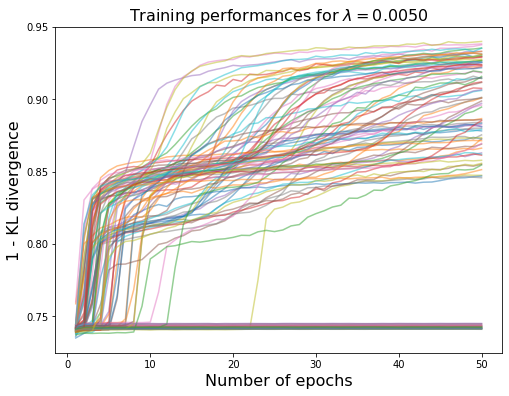

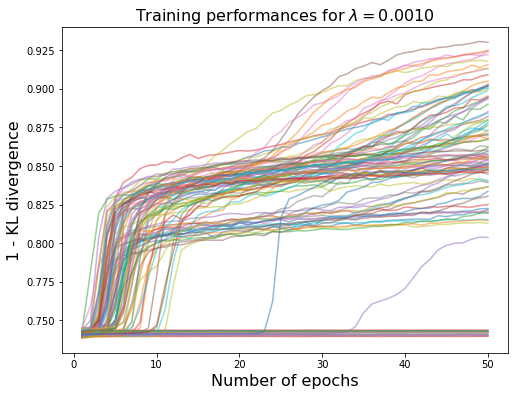

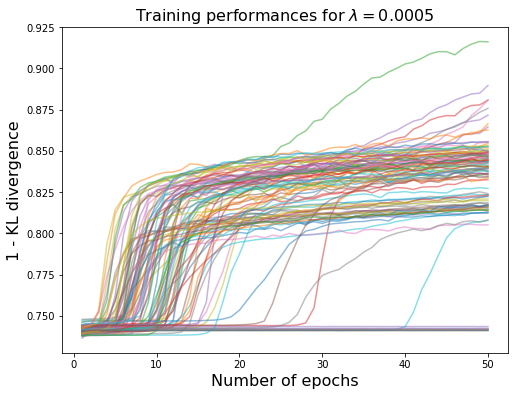

In [14]:
n_runs = len(V_train_runs)
n_epochs = np.arange(V_train_runs.shape[-1])+1

for j, lr in enumerate(lambdas):
    fig = plt.figure(figsize=(8,6))
    for i in range(n_runs):
        plt.plot(n_epochs, V_train_runs[i,j,:], alpha=0.5)
    plt.title(r"Training performances for $\lambda=%.4f$"%lambdas[j], fontsize=16)
    plt.xlabel("Number of epochs", fontsize=16)
    plt.ylabel("1 - KL divergence", fontsize=16)
    plt.show()

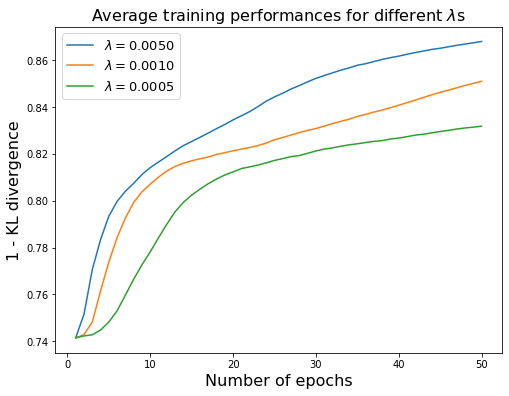

In [15]:
n_runs = len(V_train_runs)
n_epochs = np.arange(V_train_runs.shape[-1])+1


fig = plt.figure(figsize=(8,6))
for j, lr in enumerate(lambdas):
    plt.plot(n_epochs, V_train_runs.mean(axis=0)[j,:], alpha=1, label=r'$\lambda=%.4f$'%lambdas[j])
plt.title(r"Average training performances for different $\lambda$s", fontsize=16)
plt.xlabel("Number of epochs", fontsize=16)
plt.ylabel("1 - KL divergence", fontsize=16)
plt.legend(fontsize = 13)
plt.show()

Now we want to see for each value of each Hyper-Parameter the marginal advantage obtained

In [16]:
value_priors_dict = {'out_channels':([[6],[8], [12],[6,12]], [1/4, 1/4, 1/4, 1/4]),
                     'max_pool_size':([2,3,4], [0.5, 0.3, 0.2]),
                     'n_features':([16,32,64],[1/3,1/3,1/3]),
                     'info_channels':([4,6,8],[0.2, 0.3, 0.5]),
                     'mask_channels':([4,6,8],[0.2, 0.3, 0.5]),
                     'hidden_channels':([6, 12, 32], [1/3, 1/3, 1/3]),
                     'residual_hidden_dim':([16,32,64],[1/3, 1/3, 1/3]),
                     'n_residual_layers':([1,2,3,4],[0.1, 0.3, 0.3, 0.3])}

In [17]:
keys = value_priors_dict.keys()
# let's start from the first, then we'll automate the analysis
k = 'out_channels'

In [18]:
key_value_hist = {}
for v in value_priors_dict[k][0]:
    key_value_hist[str(v)] = []
key_value_hist.keys()

dict_keys(['[6]', '[8]', '[12]', '[6, 12]'])

In [19]:
for i in range(len(HPs_runs)):
    for v in key_value_hist:
        if str(HPs_runs[i][k]) == v:
            key_value_hist[v].append(V_val_runs[i])

In [20]:
for v in key_value_hist:
    key_value_hist[v] = np.array(key_value_hist[v])
    print(k+': '+v+' - shape:', key_value_hist[v].shape)

out_channels: [6] - shape: (24, 3, 50)
out_channels: [8] - shape: (25, 3, 50)
out_channels: [12] - shape: (33, 3, 50)
out_channels: [6, 12] - shape: (18, 3, 50)


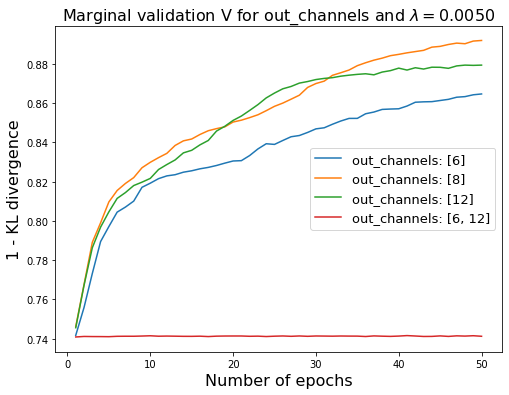

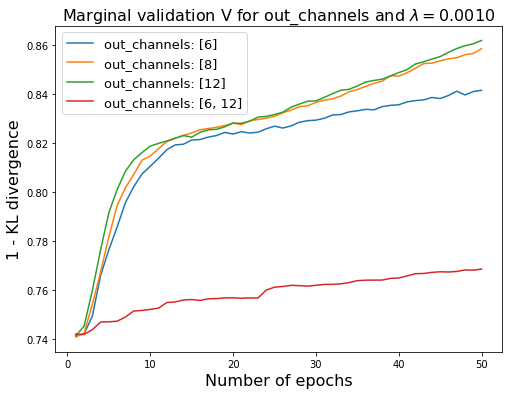

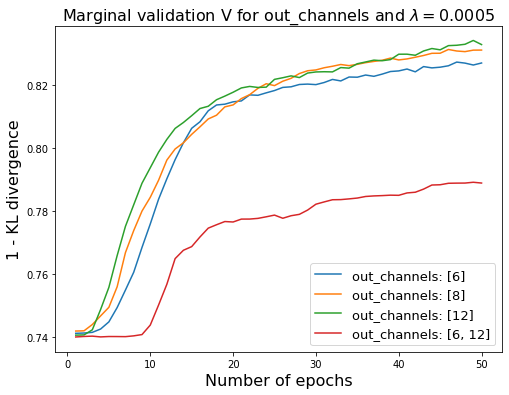

In [21]:
n_epochs = np.arange(V_val_runs.shape[-1])+1

for j, lr in enumerate(lambdas):
    fig = plt.figure(figsize=(8,6))
    for v in key_value_hist:
        plt.plot(n_epochs, key_value_hist[v].mean(axis=0)[j,:], alpha=1, label=k+': '+v)
    plt.title(r"Marginal validation V for "+k+" and $\lambda=%.4f$"%lambdas[j], fontsize=16)
    plt.xlabel("Number of epochs", fontsize=16)
    plt.ylabel("1 - KL divergence", fontsize=16)
    plt.legend(fontsize = 13)
    plt.show()

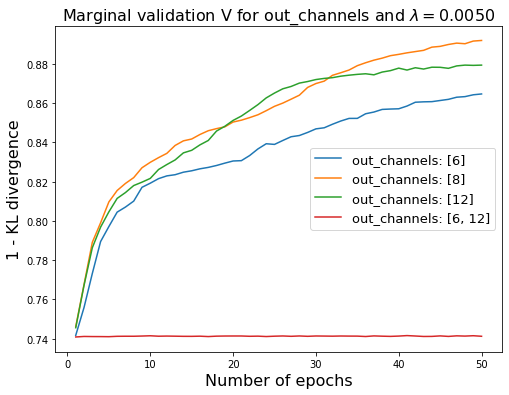

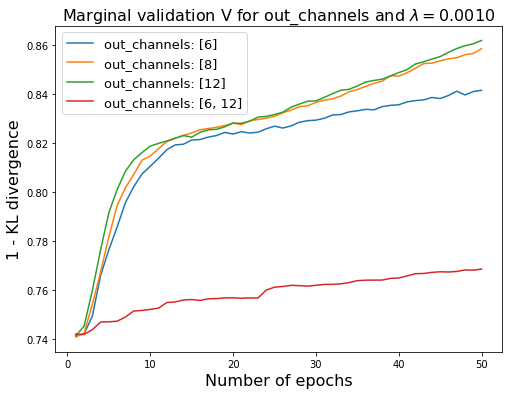

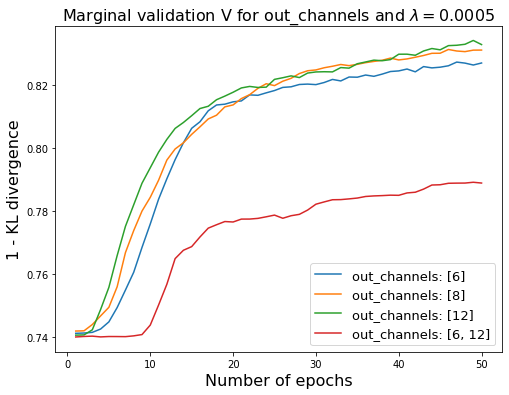

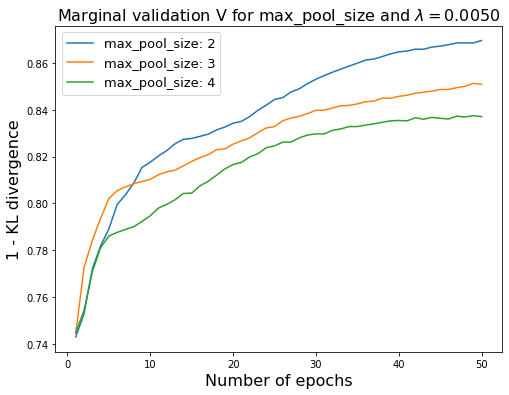

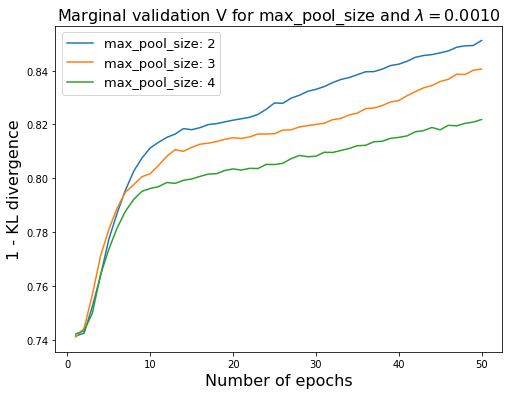

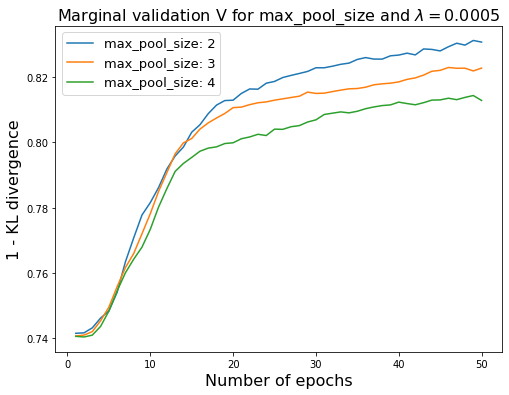

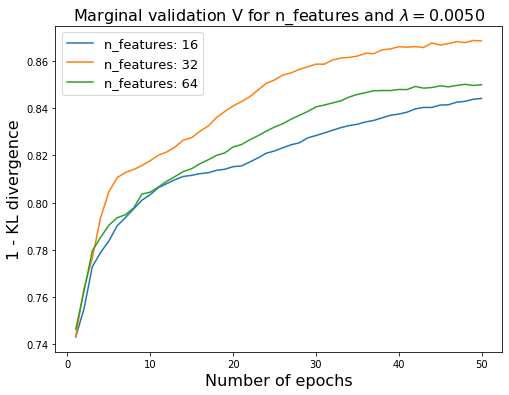

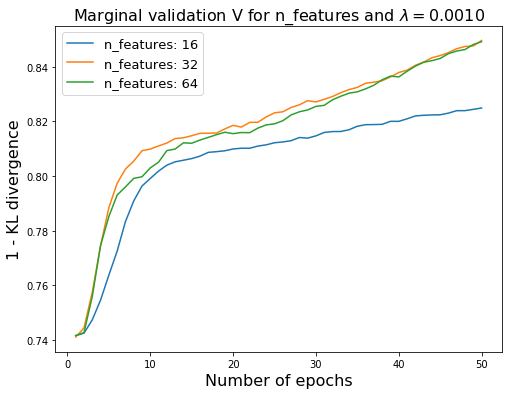

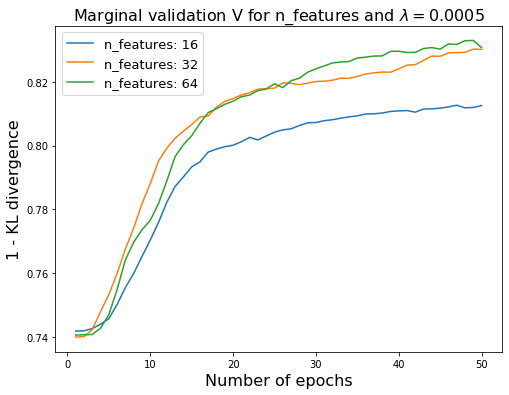

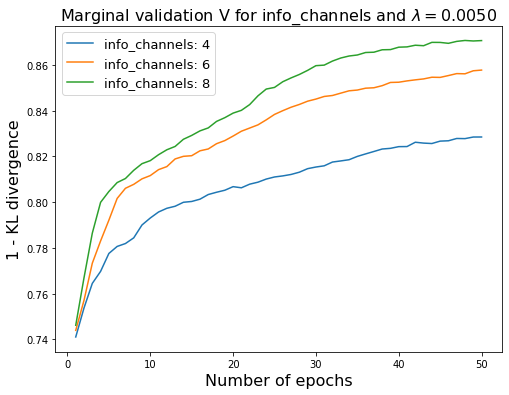

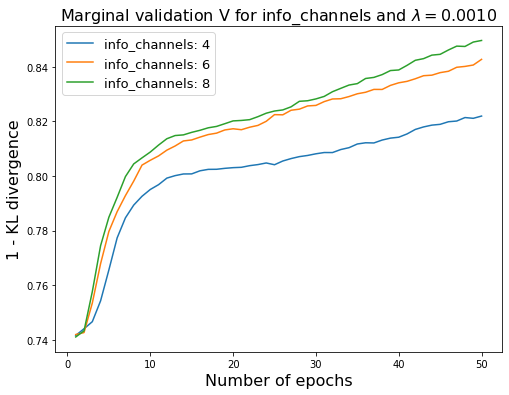

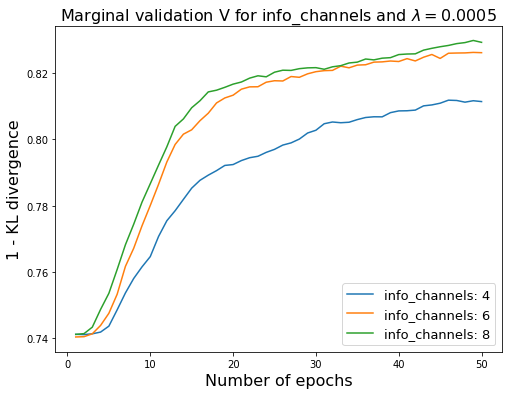

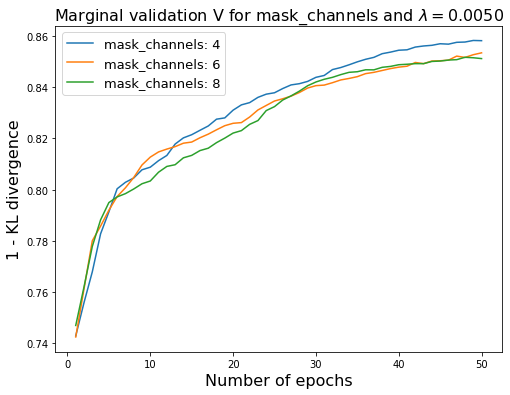

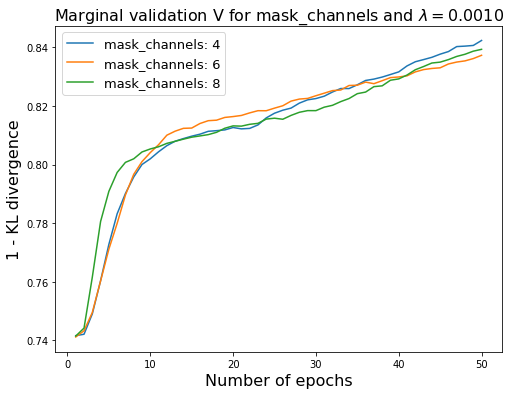

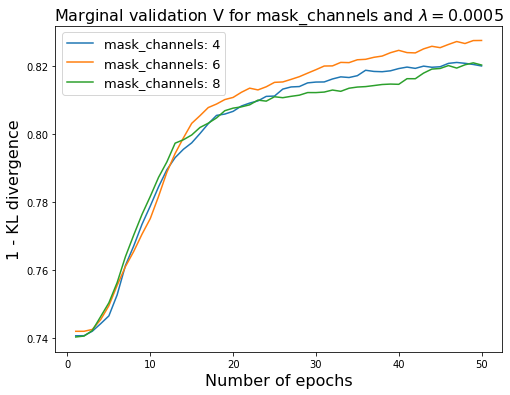

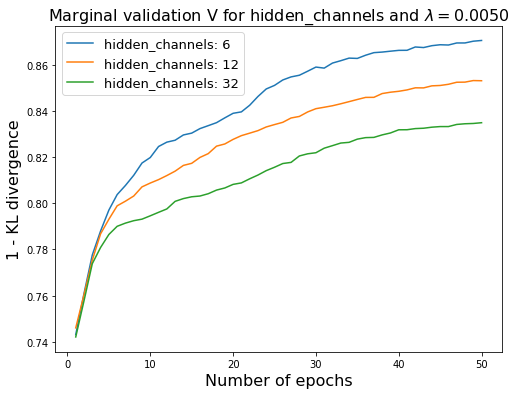

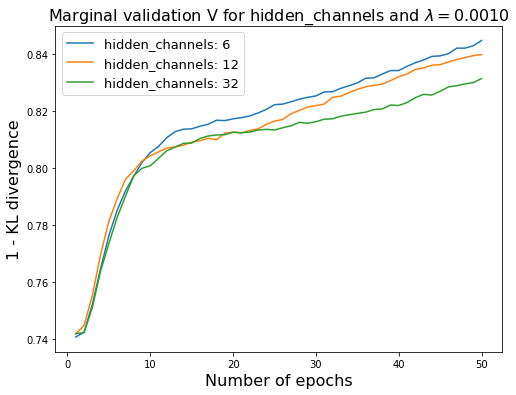

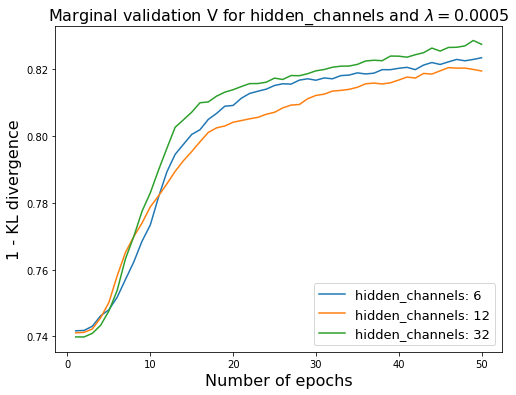

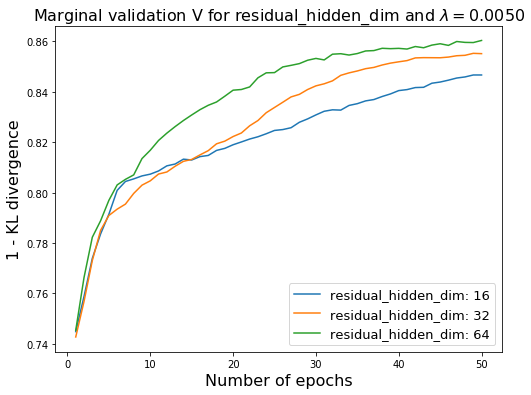

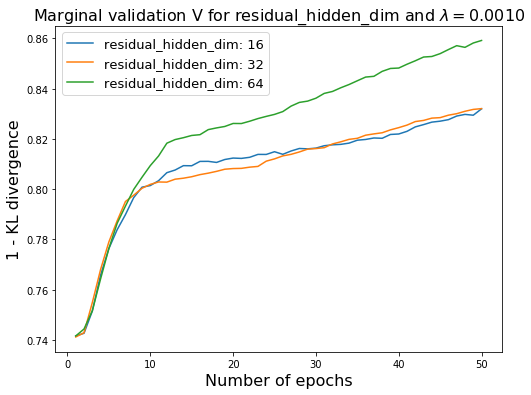

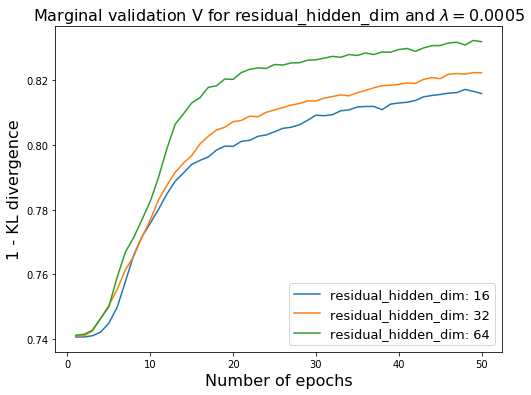

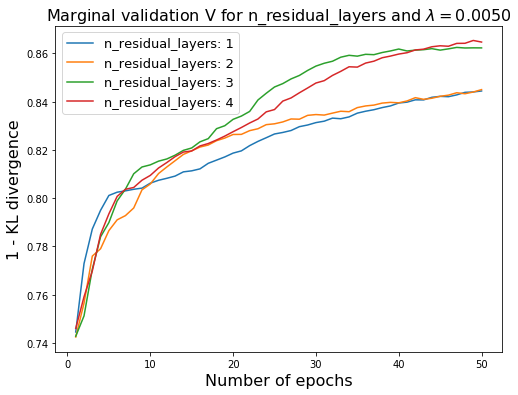

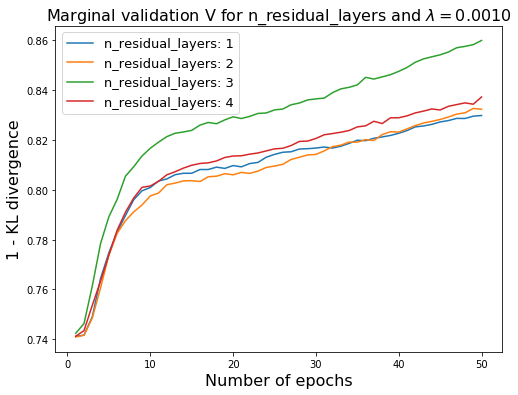

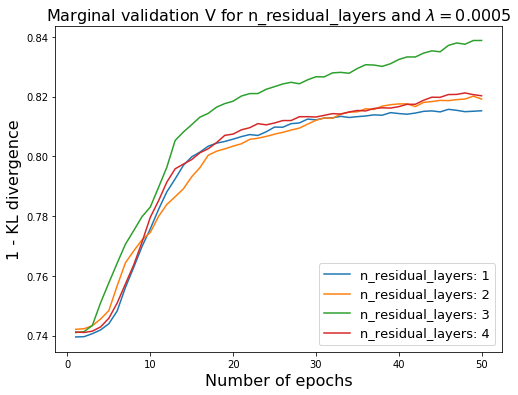

In [22]:
# Now all together
keys = value_priors_dict.keys()
for k in keys:
    # Init dictionary 
    key_value_hist = {}
    for v in value_priors_dict[k][0]:
        key_value_hist[str(v)] = []
    key_value_hist.keys()
    
    # Divide runs for values of the selected HP
    for i in range(len(HPs_runs)):
        for v in key_value_hist:
            if str(HPs_runs[i][k]) == v:
                key_value_hist[v].append(V_val_runs[i])

    # Convert in numpy arrays
    for v in key_value_hist:
        key_value_hist[v] = np.array(key_value_hist[v])
    
    n_epochs = np.arange(V_val_runs.shape[-1])+1

    # 1 plot for each lr, as many curves as values
    for j, lr in enumerate(lambdas):
        fig = plt.figure(figsize=(8,6))
        for v in key_value_hist:
            plt.plot(n_epochs, key_value_hist[v].mean(axis=0)[j,:], alpha=1, label=k+': '+v)
        plt.title(r"Marginal validation V for "+k+" and $\lambda=%.4f$"%lambdas[j], fontsize=16)
        plt.xlabel("Number of epochs", fontsize=16)
        plt.ylabel("1 - KL divergence", fontsize=16)
        plt.legend(fontsize = 13)
        plt.show()

So from this analysis I would choose:
1. out_channels = [8] or [12]
2. max_pool_size = 2
3. n_features = 32
4. info_channels = 8
5. mask_channels = 4 or 6
6. hidden_channels = 6
7. residual_hidden_dim = 64 (or I would try also 128 since it seems there is a monotonic increase)
8. n_residual_layers = 3

Let's see what is the most probable model after the bayesian optimization:

In [23]:
best_HPs = bayes_HP_tuning.return_best_model()
best_HPs

{'out_channels': [12],
 'max_pool_size': 2,
 'n_features': 32,
 'info_channels': 8,
 'mask_channels': 8,
 'hidden_channels': 6,
 'residual_hidden_dim': 64,
 'n_residual_layers': 3}

So basically except for the mask channels my intuition is confirmed by the allocation of probabilities (at least in a greedy way, i.e. choosing the best parameter as the one with highest probability), which is good!

# Intuition and probability allocation

Now we want to remake the computations used for the allocation of probability given the relative advantage of each value of a given parameter over the mean performance of them.

In [27]:
for param_name in bayes_HP_tuning.params:
    param = bayes_HP_tuning.params[param_name]
    # Probability distribution learned with current rules
    probs = param.get_updated_sampling_probs()
    
    # How is actually computed
    expected_global_V = np.mean(param.global_V)
    advantages = []
    for idx in param.stat:
        if param.stat[idx]['freq'] != 0:
            expected_Vj = np.mean(param.stat[idx]['V'])
            adv_j = (expected_Vj - expected_global_V)/expected_global_V
        else:
            adv_j = 0 # every value would do
        biased_adv_j = (param.N*param.prior_adv[idx]+param.stat[idx]['freq']*adv_j)/(param.N+param.stat[idx]['freq'])
        advantages.append(biased_adv_j)
    # sampling probs are the softmax of the biased advantages 
    advantages = np.array(advantages)
    T = 0.01
    probs1 = np.exp(advantages/T)/np.exp(advantages/T).sum()
    print("probs: ", probs)
    print("probs1: ", probs1)

probs:  [0.25266946 0.25565142 0.25581348 0.23586564]
probs1:  [1.30248886e-01 4.21035996e-01 4.48581468e-01 1.33649533e-04]
probs:  [0.34545893 0.33361748 0.32092358]
probs1:  [9.69746214e-01 2.96411846e-02 6.12601582e-04]
probs:  [0.32978766 0.33626912 0.33394322]
probs1:  [0.08695204 0.60888839 0.30415958]
probs:  [0.31929414 0.33470014 0.34600572]
probs1:  [3.12778999e-04 3.48122965e-02 9.64874924e-01]
probs:  [0.32431845 0.33287537 0.34280617]
probs1:  [0.00370095 0.05003954 0.94625952]
probs:  [0.33557636 0.33308941 0.33133423]
probs1:  [0.56964054 0.27073661 0.15962285]
probs:  [0.33089575 0.33217632 0.33692793]
probs1:  [0.11680925 0.17187961 0.71131113]
probs:  [0.23319344 0.25338094 0.25857873 0.2548469 ]
probs1:  [2.38355361e-05 9.61582572e-02 7.32608605e-01 1.71209302e-01]


Basically it makes sense to introduce a temperature parameter that starts from 1 and goes towards 0 (e.g. 1e-2).
I think that higher temperature is to noisy to focus on promising configuration and keeps too long bad configurations in game, whereas lower temperatures inhibit exploration of parameters, so an annealing procedure could be a good compromise. Next time I will use a linear annealing procedure.

In [44]:
import string
import random

save = False
keywords = ['best-multiconvnet'] # example

if save:
    save_dir = 'Results/Sandbox/Supervised/'
    ID = ''.join([random.choice(string.ascii_letters) for _ in range(4)])
    ID = ID.upper()
    keywords.append(ID)
    filename = '_'.join(keywords)
    filename = 'S_'+filename
    print("Save at "+save_dir+"best_HP_"+filename)
    torch.save(best_HPs, save_dir+"best_HP_"+filename)
else:
    print("Nothing saved")
    pass

Save at Results/Sandbox/Supervised/best_HP_S_best-multiconvnet_FQXZ
